In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


In [2]:
data = pd.read_csv("/Users/zengxin/Study/Critical Thinking/prelim_no_duplicate.csv", index_col="Unnamed: 0")

In [3]:
data.describe()

,SUBJECT_ID,FIRST_WARDID,LAST_WARDID,LOS,MORTALITY
count,116426.000000,116426.000000,116426.000000,116414.000000,116426.000000
mean,30599.282686,33.179487,33.057023,4.574419,0.481817
std,26947.255289,18.708196,18.630490,8.384030,0.499671
min,2.000000,7.000000,7.000000,0.000100,0.000000
25%,11098.000000,14.000000,14.000000,1.172900,0.000000
50%,21514.000000,33.000000,33.000000,2.152400,0.000000
75%,45036.500000,52.000000,52.000000,4.248100,1.000000
max,99999.000000,57.000000,57.000000,173.072500,1.000000


In [4]:
data["MORTALITY"]

0         0
1         0
2         0
3         0
4         0
         ..
116421    0
116422    1
116423    0
116424    1
116425    0
Name: MORTALITY, Length: 116426, dtype: int64

In [5]:
data.head(10)

,SUBJECT_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,DOD,DOD_HOSP,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,MORTALITY
0,22,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,...,NaN,NaN,MICU,MICU,52,52,2196-04-09 12:27:00,2196-04-10 15:54:00,1.1438,0
1,23,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,...,NaN,NaN,CSRU,CSRU,14,14,2153-09-03 09:38:55,2153-09-04 15:59:11,1.2641,0
2,23,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,...,NaN,NaN,SICU,SICU,57,57,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862,0
3,23,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,...,NaN,NaN,CSRU,CSRU,14,14,2153-09-03 09:38:55,2153-09-04 15:59:11,1.2641,0
4,23,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,...,NaN,NaN,SICU,SICU,57,57,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862,0
5,24,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,...,NaN,NaN,CCU,CCU,7,7,2139-06-06 16:15:36,2139-06-07 04:33:25,0.5124,0
6,25,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,...,NaN,NaN,CCU,CCU,7,7,2160-11-02 03:16:23,2160-11-05 16:23:27,3.5466,0
7,26,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,...,2128-02-25 00:00:00,NaN,CCU,CCU,57,57,2126-05-07 09:52:30,2126-05-09 13:15:05,2.1407,1
8,27,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,...,NaN,NaN,NICU,NICU,56,56,2191-11-30 22:21:15,2191-12-01 01:28:12,0.1298,0
9,28,2177-09-01 07:15:00,2177-09-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,...,NaN,NaN,CSRU,CSRU,14,14,2177-09-01 09:32:26,2177-09-02 12:28:42,1.1224,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116426 entries, 0 to 116425
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SUBJECT_ID          116426 non-null  int64  
 1   ADMITTIME           116426 non-null  object 
 2   DISCHTIME           116426 non-null  object 
 3   DEATHTIME           9348 non-null    object 
 4   ADMISSION_TYPE      116426 non-null  object 
 5   ADMISSION_LOCATION  116426 non-null  object 
 6   DISCHARGE_LOCATION  116426 non-null  object 
 7   INSURANCE           116426 non-null  object 
 8   LANGUAGE            76639 non-null   object 
 9   RELIGION            115901 non-null  object 
 10  MARITAL_STATUS      105497 non-null  object 
 11  ETHNICITY           116426 non-null  object 
 12  DIAGNOSIS           116371 non-null  object 
 13  GENDER              116426 non-null  object 
 14  DOB                 116426 non-null  object 
 15  DOD                 56096 non-null

### Data Preprocessing

In [7]:
# Preprocess data for prediction
data = data.drop(["SUBJECT_ID", "LANGUAGE", "DEATHTIME", "DOD", "DOD_HOSP"], axis=1)

In [8]:
data["DIAGNOSIS"] = pd.factorize(data["DIAGNOSIS"])[0] + 1

In [9]:
year_vars = ["ADMITTIME", "DISCHTIME", "DOB", "INTIME", "OUTTIME"]
for var in year_vars:
    data[var] = pd.to_datetime(data[var]).dt.year

In [10]:
# making Diagnosis would result in lots of columns
dummy_dict = {}
dummy_vars = ["ADMISSION_TYPE", "ADMISSION_LOCATION", "DISCHARGE_LOCATION", 
              "INSURANCE", "RELIGION", "MARITAL_STATUS", "ETHNICITY",
              "GENDER", "FIRST_CAREUNIT", "LAST_CAREUNIT"]
for var in dummy_vars:
    curr_df = pd.get_dummies(data[var], drop_first=True)
    if var == "ETHNICITY":
        curr_df = curr_df.rename(columns={'OTHER': 'OTHER - ETHNICITY'})
    dummy_dict[var] = curr_df.columns
    data = data.drop([var], axis=1)
    data = pd.concat([data, curr_df], axis=1)

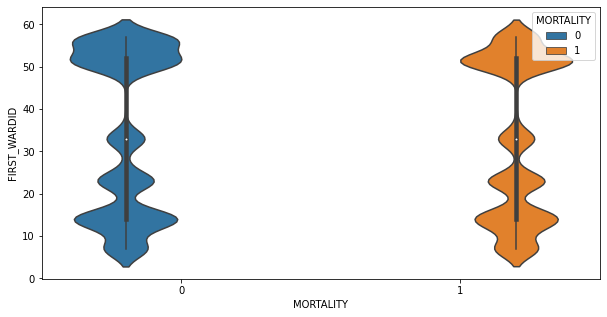

In [11]:
plt.figure(figsize=(10,5))
sns.violinplot(x = data["MORTALITY"], y = data["FIRST_WARDID"], hue=data["MORTALITY"])
plt.show()

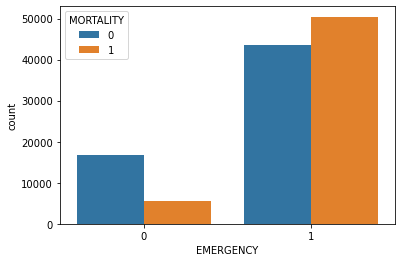

In [12]:
sns.countplot(x="EMERGENCY", hue="MORTALITY", data=data)
plt.show()

In [13]:
data.fillna(0., inplace=True)
data_y = data["MORTALITY"].values
data_x = data.drop(["MORTALITY"], axis=1)

In [14]:
data_x

,ADMITTIME,DISCHTIME,DIAGNOSIS,DOB,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,EMERGENCY,...,CSRU,MICU,NICU,SICU,TSICU,CSRU,MICU,NICU,SICU,TSICU
0,2196,2196,1,2131,52,52,2196,2196.0,1.1438,1,...,0,1,0,0,0,0,1,0,0,0
1,2153,2153,2,2082,14,14,2153,2153.0,1.2641,0,...,1,0,0,0,0,1,0,0,0,0
2,2153,2153,2,2082,57,57,2157,2157.0,1.1862,0,...,0,0,0,1,0,0,0,0,1,0
3,2157,2157,3,2082,14,14,2153,2153.0,1.2641,1,...,1,0,0,0,0,1,0,0,0,0
4,2157,2157,3,2082,57,57,2157,2157.0,1.1862,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116421,2127,2127,156,2049,15,15,2127,2127.0,2.2888,0,...,1,0,0,0,0,1,0,0,0,0
116422,2132,2132,25,2044,50,50,2132,2132.0,1.2382,1,...,0,1,0,0,0,0,1,0,0,0
116423,2131,2131,687,2111,14,14,2131,2131.0,0.8778,1,...,0,0,0,0,1,0,0,0,0,1
116424,2151,2151,238,2067,50,50,2151,2151.0,0.6202,1,...,0,1,0,0,0,0,1,0,0,0


In [15]:
dummy_dict

{'ADMISSION_TYPE': Index(['EMERGENCY', 'NEWBORN', 'URGENT'], dtype='object'),
 'ADMISSION_LOCATION': Index(['CLINIC REFERRAL/PREMATURE', 'EMERGENCY ROOM ADMIT',
        'HMO REFERRAL/SICK', 'PHYS REFERRAL/NORMAL DELI',
        'TRANSFER FROM HOSP/EXTRAM', 'TRANSFER FROM OTHER HEALT',
        'TRANSFER FROM SKILLED NUR', 'TRSF WITHIN THIS FACILITY'],
       dtype='object'),
 'DISCHARGE_LOCATION': Index(['DISC-TRAN CANCER/CHLDRN H', 'DISC-TRAN TO FEDERAL HC',
        'DISCH-TRAN TO PSYCH HOSP', 'HOME', 'HOME HEALTH CARE',
        'HOME WITH HOME IV PROVIDR', 'HOSPICE-HOME', 'HOSPICE-MEDICAL FACILITY',
        'ICF', 'LEFT AGAINST MEDICAL ADVI', 'LONG TERM CARE HOSPITAL',
        'OTHER FACILITY', 'REHAB/DISTINCT PART HOSP', 'SHORT TERM HOSPITAL',
        'SNF', 'SNF-MEDICAID ONLY CERTIF'],
       dtype='object'),
 'INSURANCE': Index(['Medicaid', 'Medicare', 'Private', 'Self Pay'], dtype='object'),
 'RELIGION': Index(['BAPTIST', 'BUDDHIST', 'CATHOLIC', 'CHRISTIAN SCIENTIST',
        'EPIS

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=66)

### Modeling Part

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
result_df = pd.DataFrame()
lr = LogisticRegression(penalty = 'none', max_iter=10000).fit(x_train, y_train)

lr_train_acc = accuracy_score(y_train, lr.predict(x_train))
lr_test_acc = accuracy_score(y_test, lr.predict(x_test))
lr_test_auc = roc_auc_score(y_test,lr.predict(x_test))
lr_train_auc = roc_auc_score(y_train,lr.predict(x_train))
lr_fpr, lr_tpr,_=roc_curve(y_test,lr.predict_proba(x_test)[:,1])

result_df = result_df.append(pd.DataFrame({'model':['logistic'],'test_accuracy':[lr_test_auc],'train_accuracy':[lr_train_acc]}),ignore_index=True)

print('Baseline logistic regression: accuracy on train set is ', str(round(lr_train_acc,4)))
print('Baseline logistic regression: accuracy on test set is ', str(round(lr_test_acc,4)))

Baseline logistic regression: accuracy on train set is  0.7112
Baseline logistic regression: accuracy on test set is  0.7075


In [18]:
def calc_FPR_FNR(condition, y_test_pred, y_test):
    true_pos_AA = ((y_test_pred == 1) & (y_test == 1) & condition).sum()
    true_neg_AA = ((y_test_pred == 0) & (y_test == 0) & condition).sum()
    false_pos_AA = ((y_test_pred == 1) & (y_test == 0) & condition).sum()
    false_neg_AA = ((y_test_pred == 0) & (y_test == 1) & condition).sum()
    FPR_AA = false_pos_AA / (true_neg_AA + false_pos_AA)
    FNR_AA = false_neg_AA / (true_pos_AA + false_neg_AA)
    
    return FPR_AA, FNR_AA

In [19]:
calc_var = ["MARITAL_STATUS", "ETHNICITY", "GENDER", "INSURANCE"]

In [20]:
dict_df = {}
y_test_pred = lr.predict(x_test)
for var in calc_var:
    df = pd.DataFrame()
    val_list, FPR, FNR = [], [], []
    for col in dummy_dict[var]:
        val_list.append(col)
        FPR_AA, FNR_AA = calc_FPR_FNR(x_test[col].values == 1., y_test_pred, y_test)
        FPR.append(FPR_AA)
        FNR.append(FNR_AA)
        if col == "M":
            val_list.append("F")
            FPR_AA, FNR_AA = calc_FPR_FNR(x_test[col].values == 0., y_test_pred, y_test)
            FPR.append(FPR_AA)
            FNR.append(FNR_AA)
    df["var_name"] = val_list
    df["FPR_Regression"] = FPR
    df["FNR_Regression"] = FNR
    dict_df[var] = df

<ipython-input-18-2296266fd41d>:6: RuntimeWarning: invalid value encountered in long_scalars
  FPR_AA = false_pos_AA / (true_neg_AA + false_pos_AA)
<ipython-input-18-2296266fd41d>:7: RuntimeWarning: invalid value encountered in long_scalars
  FNR_AA = false_neg_AA / (true_pos_AA + false_neg_AA)


In [21]:
for var in calc_var:
    print("=" * 20)
    print("Variable Name: " + var)
    print(dict_df[var])

Variable Name: MARITAL_STATUS
            var_name  FPR_Regression  FNR_Regression
0       LIFE PARTNER        0.142857        0.500000
1            MARRIED        0.310040        0.308432
2          SEPARATED        0.288991        0.321168
3             SINGLE        0.325240        0.327183
4  UNKNOWN (DEFAULT)        0.375000        0.139535
5            WIDOWED        0.542497        0.166761
Variable Name: ETHNICITY
                                             var_name  FPR_Regression  \
0   AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGN...             NaN   
1                                               ASIAN        0.155172   
2                                ASIAN - ASIAN INDIAN        0.263158   
3                                   ASIAN - CAMBODIAN             NaN   
4                                     ASIAN - CHINESE        0.254545   
5                                    ASIAN - FILIPINO        0.000000   
6                                    ASIAN - JAPANESE          

Text(0.5, 1.0, 'FPR & FNR Comparison - Gender')

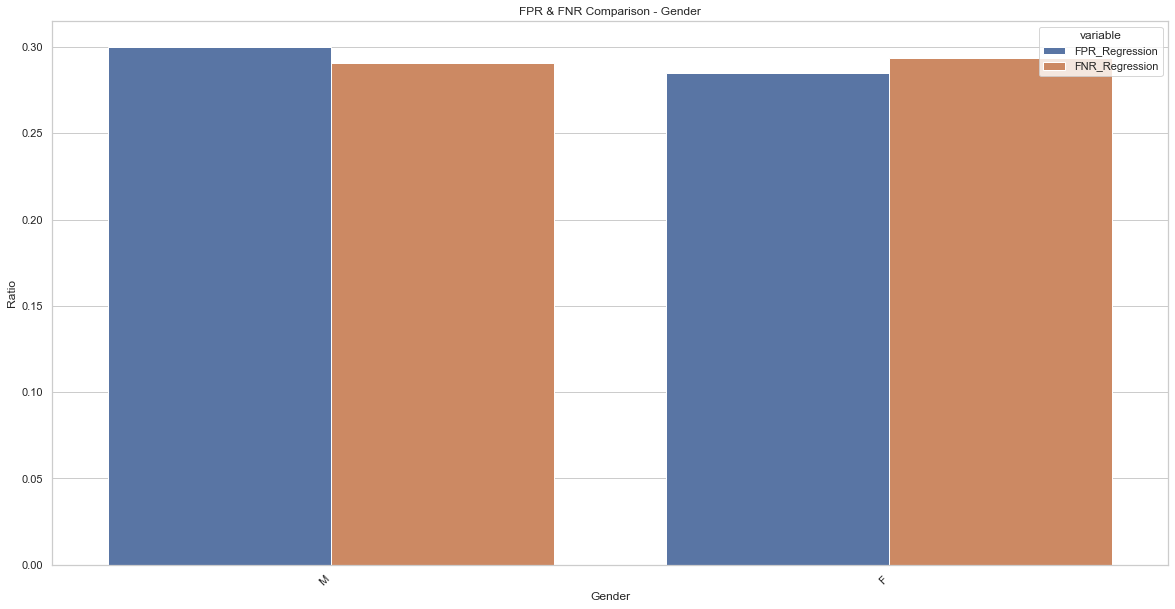

In [22]:
plot_dt = pd.melt(dict_df["GENDER"], id_vars = 'var_name')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='var_name', y='value', hue='variable', data=plot_dt)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.ylabel('Ratio')
plt.xlabel('Gender')
plt.title("FPR & FNR Comparison - Gender")

Text(0.5, 1.0, 'FPR & FNR Comparison - Insurance')

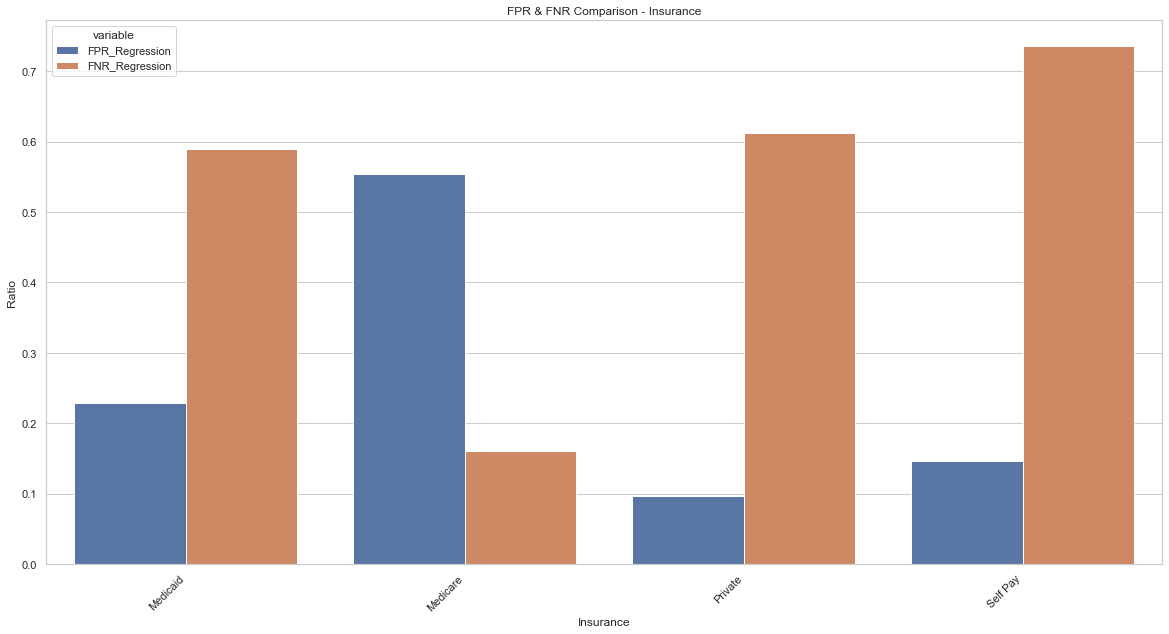

In [23]:
plot_dt = pd.melt(dict_df["INSURANCE"], id_vars = 'var_name')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='var_name', y='value', hue='variable', data=plot_dt)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.ylabel('Ratio')
plt.xlabel('Insurance')
plt.title("FPR & FNR Comparison - Insurance")

Text(0.5, 1.0, 'FPR & FNR Comparison - Ethnicity')

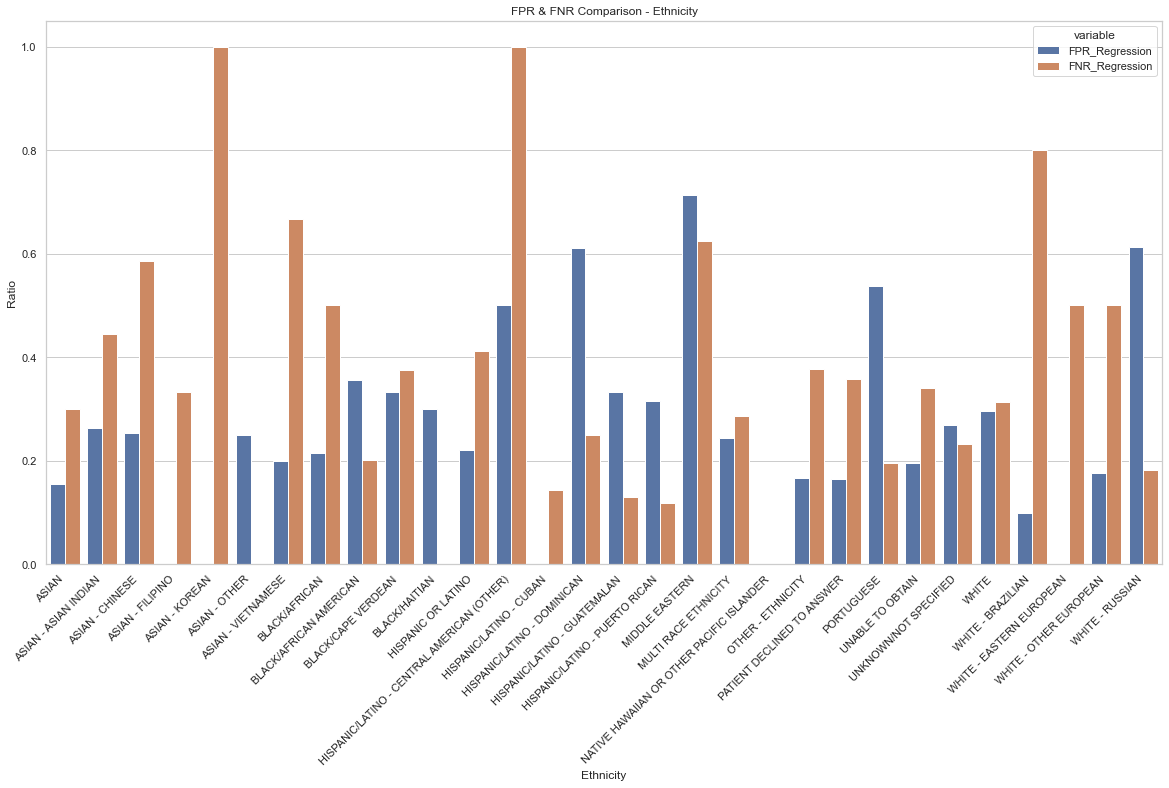

In [24]:
plot_dt = pd.melt(dict_df["ETHNICITY"].dropna(axis=0), id_vars = 'var_name')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='var_name', y='value', hue='variable', data=plot_dt)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.ylabel('Ratio')
plt.xlabel('Ethnicity')
plt.title("FPR & FNR Comparison - Ethnicity")

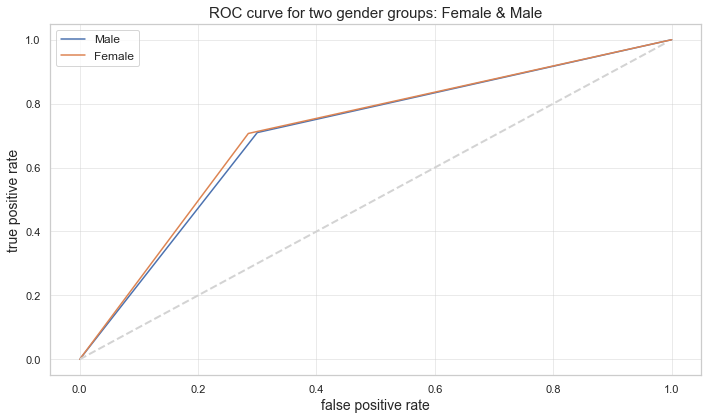

In [25]:
rate_values=np.arange(0,100)/100
fig, ax = plt.subplots(figsize=(10, 6))
fpr_AA, tpr_AA, threshold_AA = roc_curve(y_test[(x_test["M"].values == 1.)], 
                                y_test_pred[(x_test["M"].values == 1.)])
fpr_CC, tpr_CC, threshold_CC = roc_curve(y_test[(x_test["M"].values == 0.)], 
                                y_test_pred[(x_test["M"].values == 0.)])
ax.plot(fpr_AA, tpr_AA, linewidth=1.5, label = "Male")
ax.plot(fpr_CC, tpr_CC, linewidth=1.5, label = "Female")
ax.set_ylabel("true positive rate", fontsize=14)
ax.set_xlabel("false positive rate", fontsize=14)
plt.plot(rate_values, rate_values, '--', color="lightgray", linewidth=2, alpha=1)

plt.title(
    "ROC curve for two gender groups: Female & Male",
    fontsize=15)
plt.legend(fontsize=12)
plt.grid(':', alpha=0.4)
plt.tight_layout()
plt.show()

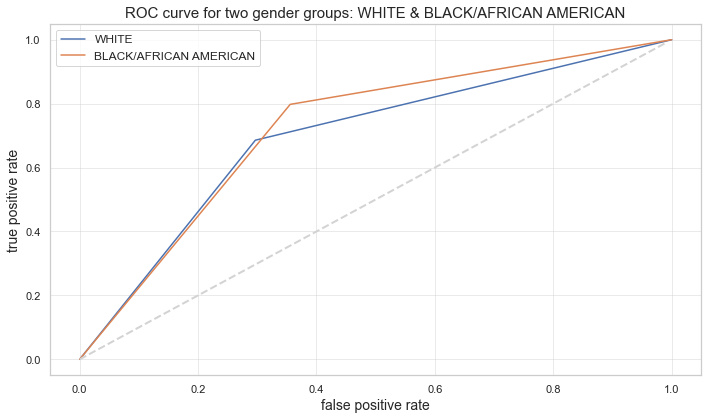

In [26]:
rate_values=np.arange(0,100)/100
fig, ax = plt.subplots(figsize=(10, 6))
fpr_AA, tpr_AA, threshold_AA = roc_curve(y_test[(x_test["WHITE"].values == 1.)], 
                                y_test_pred[(x_test["WHITE"].values == 1.)])
fpr_CC, tpr_CC, threshold_CC = roc_curve(y_test[(x_test["BLACK/AFRICAN AMERICAN"].values == 1.)], 
                                y_test_pred[(x_test["BLACK/AFRICAN AMERICAN"].values == 1.)])
ax.plot(fpr_AA, tpr_AA, linewidth=1.5, label = "WHITE")
ax.plot(fpr_CC, tpr_CC, linewidth=1.5, label = "BLACK/AFRICAN AMERICAN")
ax.set_ylabel("true positive rate", fontsize=14)
ax.set_xlabel("false positive rate", fontsize=14)
plt.plot(rate_values, rate_values, '--', color="lightgray", linewidth=2, alpha=1)

plt.title(
    "ROC curve for two gender groups: WHITE & BLACK/AFRICAN AMERICAN",
    fontsize=15)
plt.legend(fontsize=12)
plt.grid(':', alpha=0.4)
plt.tight_layout()
plt.show()

In [27]:
new_thresholds = np.linspace(0, 1, 100)
ratio_FPR4_list = []
valid_index_FPR4 = []
ratio_FNR4_list = []
valid_index_FNR4 = []
accu = []
for i in range(len(new_thresholds)):
    new_threshold = new_thresholds[i]
    y_test_pred4 = lr.predict_proba(x_test)[:, 1]
    y_new_class = np.zeros(y_test_pred4.shape)
    y_new_class[y_test_pred4 >= new_threshold] = 1
    accu.append(accuracy_score(y_test, y_new_class))
    true_pos_AA4 = ((y_new_class == 1) & (x_test["WHITE"].values == 1.) & (y_test == 1)).sum()
    true_neg_AA4 = ((y_new_class == 0) & (y_test == 0) & (x_test["WHITE"].values == 1.)).sum()
    false_pos_AA4 = ((y_new_class == 1) & (y_test == 0) & (x_test["WHITE"].values == 1.)).sum()
    false_neg_AA4 = ((y_new_class == 0) & (y_test == 1) & (x_test["WHITE"].values == 1.)).sum()
    FPR_AA4 = false_pos_AA4 / (true_neg_AA4 + false_pos_AA4)
    FNR_AA4 = false_neg_AA4 / (true_pos_AA4 + false_neg_AA4)
    true_pos_CC4 = ((y_new_class == 1) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.) & (y_test == 1)).sum()
    true_neg_CC4 = ((y_new_class == 0) & (y_test == 0) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.)).sum()
    false_pos_CC4 = ((y_new_class == 1) & (y_test == 0) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.)).sum()
    false_neg_CC4 = ((y_new_class == 0) & (y_test == 1) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.)).sum()
    FPR_CC4 = false_pos_CC4 / (true_neg_CC4 + false_pos_CC4)
    FNR_CC4 = false_neg_CC4 / (true_pos_CC4 + false_neg_CC4)
    if FPR_CC4 != 0.:
        ratio_FPR4 = FPR_AA4 / FPR_CC4
        ratio_FPR4_list.append(ratio_FPR4)
        valid_index_FPR4.append(i)
    if FNR_CC4 != 0.:
        ratio_FNR4 = FNR_AA4 / FNR_CC4
        ratio_FNR4_list.append(ratio_FNR4)
        valid_index_FNR4.append(i)

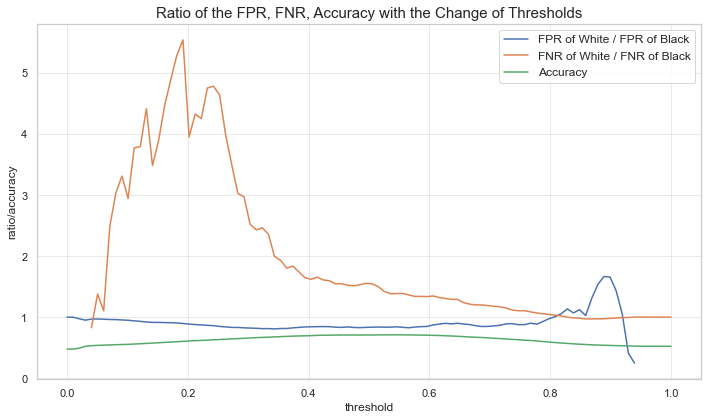

In [28]:
fig = plt.subplots(figsize=(10, 6))
plt.plot(np.array(new_thresholds)[valid_index_FPR4], np.array(ratio_FPR4_list), label="FPR of White / FPR of Black")
plt.plot(np.array(new_thresholds)[valid_index_FNR4], np.array(ratio_FNR4_list), label="FNR of White / FNR of Black")
plt.plot(new_thresholds, accu, label="Accuracy")
plt.xlabel("threshold")
plt.ylabel("ratio/accuracy")
plt.title(
    "Ratio of the FPR, FNR, Accuracy with the Change of Thresholds",
    fontsize=15)
plt.legend(fontsize=12)
plt.grid(':', alpha=0.4)
plt.tight_layout()
plt.show()

In [29]:
x_train_gbm, x_val_gbm, y_train_gbm, y_val_gbm = train_test_split(x_train, y_train, train_size=0.85, random_state=1)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'max_depth': 1000,
    'seed': 1
}
lgb_train = lgb.Dataset(x_train_gbm, y_train_gbm, feature_name=list(x_train.columns))
lgb_eval = lgb.Dataset(x_val_gbm, y_val_gbm, feature_name=list(x_train.columns))
model2 = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_train, lgb_eval], 
                   valid_names=["train", "eval"], early_stopping_rounds=1000)
y_pred_train = model2.predict(x_train, num_iteration=model2.best_iteration)
y_pred_lgb_train = y_pred_train.round(0)
acc_lgb_train = accuracy_score(y_train, y_pred_lgb_train)

y_pred_test = model2.predict(x_test, num_iteration=model2.best_iteration)
y_pred_lgb_test = y_pred_test.round(0)
acc_lgb_test = accuracy_score(y_test, y_pred_lgb_test)

lgb_test_auc = roc_auc_score(y_test, y_pred_lgb_test)
lgb_train_auc = roc_auc_score(y_train, y_pred_lgb_train)
lgb_fpr, lgb_tpr,_=roc_curve(y_test, y_pred_test)

result_df = result_df.append(pd.DataFrame({'model':['lightgbm'], 'test_accuracy':[acc_lgb_test],
                                         'train_accuracy':[acc_lgb_train]}),ignore_index=True)

print("Accuracy in train set is: " + str(round(acc_lgb_train, 4)))
print("Accuracy in test set is: " + str(round(acc_lgb_test, 4)))

[1]	train's binary_logloss: 0.689738	eval's binary_logloss: 0.690035
Training until validation scores don't improve for 1000 rounds
[2]	train's binary_logloss: 0.686997	eval's binary_logloss: 0.687344
[3]	train's binary_logloss: 0.684449	eval's binary_logloss: 0.68486
[4]	train's binary_logloss: 0.681837	eval's binary_logloss: 0.68231
[5]	train's binary_logloss: 0.679189	eval's binary_logloss: 0.679714
[6]	train's binary_logloss: 0.676601	eval's binary_logloss: 0.677191
[7]	train's binary_logloss: 0.674008	eval's binary_logloss: 0.674654
[8]	train's binary_logloss: 0.671627	eval's binary_logloss: 0.672279
[9]	train's binary_logloss: 0.669195	eval's binary_logloss: 0.669931
[10]	train's binary_logloss: 0.666765	eval's binary_logloss: 0.667559
[11]	train's binary_logloss: 0.66451	eval's binary_logloss: 0.665334
[12]	train's binary_logloss: 0.662151	eval's binary_logloss: 0.663034
[13]	train's binary_logloss: 0.659994	eval's binary_logloss: 0.660907
[14]	train's binary_logloss: 0.657959	e

[118]	train's binary_logloss: 0.537678	eval's binary_logloss: 0.542723
[119]	train's binary_logloss: 0.537108	eval's binary_logloss: 0.542194
[120]	train's binary_logloss: 0.536502	eval's binary_logloss: 0.541601
[121]	train's binary_logloss: 0.535939	eval's binary_logloss: 0.541084
[122]	train's binary_logloss: 0.535386	eval's binary_logloss: 0.540575
[123]	train's binary_logloss: 0.534842	eval's binary_logloss: 0.540076
[124]	train's binary_logloss: 0.534304	eval's binary_logloss: 0.539578
[125]	train's binary_logloss: 0.533658	eval's binary_logloss: 0.538979
[126]	train's binary_logloss: 0.533092	eval's binary_logloss: 0.53843
[127]	train's binary_logloss: 0.532536	eval's binary_logloss: 0.537902
[128]	train's binary_logloss: 0.531943	eval's binary_logloss: 0.537326
[129]	train's binary_logloss: 0.531395	eval's binary_logloss: 0.536793
[130]	train's binary_logloss: 0.530889	eval's binary_logloss: 0.536305
[131]	train's binary_logloss: 0.530419	eval's binary_logloss: 0.535883
[132]	t

[273]	train's binary_logloss: 0.473404	eval's binary_logloss: 0.482169
[274]	train's binary_logloss: 0.473227	eval's binary_logloss: 0.482001
[275]	train's binary_logloss: 0.473036	eval's binary_logloss: 0.481837
[276]	train's binary_logloss: 0.472743	eval's binary_logloss: 0.481572
[277]	train's binary_logloss: 0.47249	eval's binary_logloss: 0.481332
[278]	train's binary_logloss: 0.472271	eval's binary_logloss: 0.481139
[279]	train's binary_logloss: 0.471987	eval's binary_logloss: 0.480869
[280]	train's binary_logloss: 0.47171	eval's binary_logloss: 0.480623
[281]	train's binary_logloss: 0.471322	eval's binary_logloss: 0.480257
[282]	train's binary_logloss: 0.47095	eval's binary_logloss: 0.479909
[283]	train's binary_logloss: 0.47072	eval's binary_logloss: 0.479713
[284]	train's binary_logloss: 0.470496	eval's binary_logloss: 0.479515
[285]	train's binary_logloss: 0.470183	eval's binary_logloss: 0.479223
[286]	train's binary_logloss: 0.469975	eval's binary_logloss: 0.479037
[287]	trai

[394]	train's binary_logloss: 0.446353	eval's binary_logloss: 0.458301
[395]	train's binary_logloss: 0.446152	eval's binary_logloss: 0.458116
[396]	train's binary_logloss: 0.445997	eval's binary_logloss: 0.457991
[397]	train's binary_logloss: 0.445837	eval's binary_logloss: 0.45786
[398]	train's binary_logloss: 0.44568	eval's binary_logloss: 0.45773
[399]	train's binary_logloss: 0.445482	eval's binary_logloss: 0.457548
[400]	train's binary_logloss: 0.445336	eval's binary_logloss: 0.457431
[401]	train's binary_logloss: 0.445155	eval's binary_logloss: 0.457273
[402]	train's binary_logloss: 0.44495	eval's binary_logloss: 0.457089
[403]	train's binary_logloss: 0.444828	eval's binary_logloss: 0.456979
[404]	train's binary_logloss: 0.444717	eval's binary_logloss: 0.456887
[405]	train's binary_logloss: 0.444493	eval's binary_logloss: 0.456676
[406]	train's binary_logloss: 0.444309	eval's binary_logloss: 0.456521
[407]	train's binary_logloss: 0.444173	eval's binary_logloss: 0.456418
[408]	trai

[530]	train's binary_logloss: 0.426865	eval's binary_logloss: 0.441416
[531]	train's binary_logloss: 0.426734	eval's binary_logloss: 0.441297
[532]	train's binary_logloss: 0.426521	eval's binary_logloss: 0.4411
[533]	train's binary_logloss: 0.426315	eval's binary_logloss: 0.44091
[534]	train's binary_logloss: 0.42611	eval's binary_logloss: 0.44072
[535]	train's binary_logloss: 0.425987	eval's binary_logloss: 0.440641
[536]	train's binary_logloss: 0.425895	eval's binary_logloss: 0.440562
[537]	train's binary_logloss: 0.425792	eval's binary_logloss: 0.440465
[538]	train's binary_logloss: 0.425688	eval's binary_logloss: 0.44038
[539]	train's binary_logloss: 0.42557	eval's binary_logloss: 0.440265
[540]	train's binary_logloss: 0.425429	eval's binary_logloss: 0.44015
[541]	train's binary_logloss: 0.425309	eval's binary_logloss: 0.44005
[542]	train's binary_logloss: 0.425186	eval's binary_logloss: 0.439956
[543]	train's binary_logloss: 0.424989	eval's binary_logloss: 0.439774
[544]	train's b

[689]	train's binary_logloss: 0.410137	eval's binary_logloss: 0.42697
[690]	train's binary_logloss: 0.410065	eval's binary_logloss: 0.426912
[691]	train's binary_logloss: 0.409984	eval's binary_logloss: 0.426844
[692]	train's binary_logloss: 0.409902	eval's binary_logloss: 0.426777
[693]	train's binary_logloss: 0.409821	eval's binary_logloss: 0.426711
[694]	train's binary_logloss: 0.40975	eval's binary_logloss: 0.426652
[695]	train's binary_logloss: 0.409675	eval's binary_logloss: 0.426582
[696]	train's binary_logloss: 0.409523	eval's binary_logloss: 0.426436
[697]	train's binary_logloss: 0.409445	eval's binary_logloss: 0.42638
[698]	train's binary_logloss: 0.40938	eval's binary_logloss: 0.426329
[699]	train's binary_logloss: 0.409233	eval's binary_logloss: 0.426182
[700]	train's binary_logloss: 0.409107	eval's binary_logloss: 0.426062
[701]	train's binary_logloss: 0.409021	eval's binary_logloss: 0.425982
[702]	train's binary_logloss: 0.408953	eval's binary_logloss: 0.425931
[703]	trai

[806]	train's binary_logloss: 0.400911	eval's binary_logloss: 0.419139
[807]	train's binary_logloss: 0.400844	eval's binary_logloss: 0.419079
[808]	train's binary_logloss: 0.400794	eval's binary_logloss: 0.419037
[809]	train's binary_logloss: 0.40073	eval's binary_logloss: 0.418989
[810]	train's binary_logloss: 0.400667	eval's binary_logloss: 0.418949
[811]	train's binary_logloss: 0.400603	eval's binary_logloss: 0.418895
[812]	train's binary_logloss: 0.400552	eval's binary_logloss: 0.418859
[813]	train's binary_logloss: 0.400474	eval's binary_logloss: 0.41879
[814]	train's binary_logloss: 0.400376	eval's binary_logloss: 0.418712
[815]	train's binary_logloss: 0.400328	eval's binary_logloss: 0.418675
[816]	train's binary_logloss: 0.400235	eval's binary_logloss: 0.418589
[817]	train's binary_logloss: 0.400132	eval's binary_logloss: 0.418489
[818]	train's binary_logloss: 0.400017	eval's binary_logloss: 0.418374
[819]	train's binary_logloss: 0.399952	eval's binary_logloss: 0.418325
[820]	tr

[928]	train's binary_logloss: 0.392849	eval's binary_logloss: 0.412529
[929]	train's binary_logloss: 0.392786	eval's binary_logloss: 0.412481
[930]	train's binary_logloss: 0.392734	eval's binary_logloss: 0.412456
[931]	train's binary_logloss: 0.392658	eval's binary_logloss: 0.412388
[932]	train's binary_logloss: 0.392578	eval's binary_logloss: 0.412316
[933]	train's binary_logloss: 0.392509	eval's binary_logloss: 0.412258
[934]	train's binary_logloss: 0.392433	eval's binary_logloss: 0.412199
[935]	train's binary_logloss: 0.392364	eval's binary_logloss: 0.412134
[936]	train's binary_logloss: 0.392306	eval's binary_logloss: 0.41208
[937]	train's binary_logloss: 0.392264	eval's binary_logloss: 0.412052
[938]	train's binary_logloss: 0.392223	eval's binary_logloss: 0.412027
[939]	train's binary_logloss: 0.392116	eval's binary_logloss: 0.411929
[940]	train's binary_logloss: 0.392067	eval's binary_logloss: 0.411899
[941]	train's binary_logloss: 0.392027	eval's binary_logloss: 0.411869
[942]	t

[1060]	train's binary_logloss: 0.385378	eval's binary_logloss: 0.406733
[1061]	train's binary_logloss: 0.385336	eval's binary_logloss: 0.406708
[1062]	train's binary_logloss: 0.385275	eval's binary_logloss: 0.406659
[1063]	train's binary_logloss: 0.385164	eval's binary_logloss: 0.406555
[1064]	train's binary_logloss: 0.385105	eval's binary_logloss: 0.406515
[1065]	train's binary_logloss: 0.385018	eval's binary_logloss: 0.406442
[1066]	train's binary_logloss: 0.384972	eval's binary_logloss: 0.406406
[1067]	train's binary_logloss: 0.384906	eval's binary_logloss: 0.406348
[1068]	train's binary_logloss: 0.384848	eval's binary_logloss: 0.406307
[1069]	train's binary_logloss: 0.384788	eval's binary_logloss: 0.406257
[1070]	train's binary_logloss: 0.38474	eval's binary_logloss: 0.406234
[1071]	train's binary_logloss: 0.384681	eval's binary_logloss: 0.406193
[1072]	train's binary_logloss: 0.384611	eval's binary_logloss: 0.406135
[1073]	train's binary_logloss: 0.384557	eval's binary_logloss: 0.

[1176]	train's binary_logloss: 0.379038	eval's binary_logloss: 0.401835
[1177]	train's binary_logloss: 0.378974	eval's binary_logloss: 0.40178
[1178]	train's binary_logloss: 0.37893	eval's binary_logloss: 0.401751
[1179]	train's binary_logloss: 0.378867	eval's binary_logloss: 0.4017
[1180]	train's binary_logloss: 0.378826	eval's binary_logloss: 0.401673
[1181]	train's binary_logloss: 0.378732	eval's binary_logloss: 0.401593
[1182]	train's binary_logloss: 0.378639	eval's binary_logloss: 0.401507
[1183]	train's binary_logloss: 0.378547	eval's binary_logloss: 0.401429
[1184]	train's binary_logloss: 0.378471	eval's binary_logloss: 0.40136
[1185]	train's binary_logloss: 0.378387	eval's binary_logloss: 0.401292
[1186]	train's binary_logloss: 0.378333	eval's binary_logloss: 0.401252
[1187]	train's binary_logloss: 0.378297	eval's binary_logloss: 0.401225
[1188]	train's binary_logloss: 0.378254	eval's binary_logloss: 0.401185
[1189]	train's binary_logloss: 0.378212	eval's binary_logloss: 0.4011

[1309]	train's binary_logloss: 0.372707	eval's binary_logloss: 0.397174
[1310]	train's binary_logloss: 0.372639	eval's binary_logloss: 0.397116
[1311]	train's binary_logloss: 0.3726	eval's binary_logloss: 0.397092
[1312]	train's binary_logloss: 0.372555	eval's binary_logloss: 0.397066
[1313]	train's binary_logloss: 0.372511	eval's binary_logloss: 0.397036
[1314]	train's binary_logloss: 0.372468	eval's binary_logloss: 0.39701
[1315]	train's binary_logloss: 0.372428	eval's binary_logloss: 0.39699
[1316]	train's binary_logloss: 0.372399	eval's binary_logloss: 0.396977
[1317]	train's binary_logloss: 0.372367	eval's binary_logloss: 0.396969
[1318]	train's binary_logloss: 0.372329	eval's binary_logloss: 0.396943
[1319]	train's binary_logloss: 0.3723	eval's binary_logloss: 0.396925
[1320]	train's binary_logloss: 0.372267	eval's binary_logloss: 0.396917
[1321]	train's binary_logloss: 0.372229	eval's binary_logloss: 0.396882
[1322]	train's binary_logloss: 0.372187	eval's binary_logloss: 0.39685

[1441]	train's binary_logloss: 0.366268	eval's binary_logloss: 0.392188
[1442]	train's binary_logloss: 0.366228	eval's binary_logloss: 0.392166
[1443]	train's binary_logloss: 0.366188	eval's binary_logloss: 0.392143
[1444]	train's binary_logloss: 0.36615	eval's binary_logloss: 0.392114
[1445]	train's binary_logloss: 0.366108	eval's binary_logloss: 0.392098
[1446]	train's binary_logloss: 0.366068	eval's binary_logloss: 0.392069
[1447]	train's binary_logloss: 0.366033	eval's binary_logloss: 0.392046
[1448]	train's binary_logloss: 0.365995	eval's binary_logloss: 0.392016
[1449]	train's binary_logloss: 0.365947	eval's binary_logloss: 0.391979
[1450]	train's binary_logloss: 0.365922	eval's binary_logloss: 0.391964
[1451]	train's binary_logloss: 0.365857	eval's binary_logloss: 0.391904
[1452]	train's binary_logloss: 0.365824	eval's binary_logloss: 0.39188
[1453]	train's binary_logloss: 0.365792	eval's binary_logloss: 0.391852
[1454]	train's binary_logloss: 0.365748	eval's binary_logloss: 0.3

[1565]	train's binary_logloss: 0.36089	eval's binary_logloss: 0.388357
[1566]	train's binary_logloss: 0.360863	eval's binary_logloss: 0.388346
[1567]	train's binary_logloss: 0.360826	eval's binary_logloss: 0.388327
[1568]	train's binary_logloss: 0.360806	eval's binary_logloss: 0.388326
[1569]	train's binary_logloss: 0.360768	eval's binary_logloss: 0.388305
[1570]	train's binary_logloss: 0.360734	eval's binary_logloss: 0.388285
[1571]	train's binary_logloss: 0.360698	eval's binary_logloss: 0.388267
[1572]	train's binary_logloss: 0.360677	eval's binary_logloss: 0.388251
[1573]	train's binary_logloss: 0.36064	eval's binary_logloss: 0.388232
[1574]	train's binary_logloss: 0.3606	eval's binary_logloss: 0.388202
[1575]	train's binary_logloss: 0.360567	eval's binary_logloss: 0.388172
[1576]	train's binary_logloss: 0.360505	eval's binary_logloss: 0.388128
[1577]	train's binary_logloss: 0.360442	eval's binary_logloss: 0.388081
[1578]	train's binary_logloss: 0.360401	eval's binary_logloss: 0.388

[1693]	train's binary_logloss: 0.356233	eval's binary_logloss: 0.385011
[1694]	train's binary_logloss: 0.356215	eval's binary_logloss: 0.385003
[1695]	train's binary_logloss: 0.356157	eval's binary_logloss: 0.384961
[1696]	train's binary_logloss: 0.356115	eval's binary_logloss: 0.384944
[1697]	train's binary_logloss: 0.356064	eval's binary_logloss: 0.384913
[1698]	train's binary_logloss: 0.356024	eval's binary_logloss: 0.384898
[1699]	train's binary_logloss: 0.355985	eval's binary_logloss: 0.384878
[1700]	train's binary_logloss: 0.355945	eval's binary_logloss: 0.384858
[1701]	train's binary_logloss: 0.355893	eval's binary_logloss: 0.384825
[1702]	train's binary_logloss: 0.355843	eval's binary_logloss: 0.384786
[1703]	train's binary_logloss: 0.355793	eval's binary_logloss: 0.384755
[1704]	train's binary_logloss: 0.355745	eval's binary_logloss: 0.384722
[1705]	train's binary_logloss: 0.355692	eval's binary_logloss: 0.384669
[1706]	train's binary_logloss: 0.355639	eval's binary_logloss: 0

[1835]	train's binary_logloss: 0.350788	eval's binary_logloss: 0.381223
[1836]	train's binary_logloss: 0.350749	eval's binary_logloss: 0.381197
[1837]	train's binary_logloss: 0.350711	eval's binary_logloss: 0.381165
[1838]	train's binary_logloss: 0.350677	eval's binary_logloss: 0.381148
[1839]	train's binary_logloss: 0.350641	eval's binary_logloss: 0.381125
[1840]	train's binary_logloss: 0.350608	eval's binary_logloss: 0.381093
[1841]	train's binary_logloss: 0.350575	eval's binary_logloss: 0.381079
[1842]	train's binary_logloss: 0.350542	eval's binary_logloss: 0.381063
[1843]	train's binary_logloss: 0.35051	eval's binary_logloss: 0.381053
[1844]	train's binary_logloss: 0.35048	eval's binary_logloss: 0.381037
[1845]	train's binary_logloss: 0.350448	eval's binary_logloss: 0.381028
[1846]	train's binary_logloss: 0.350413	eval's binary_logloss: 0.381006
[1847]	train's binary_logloss: 0.35037	eval's binary_logloss: 0.380978
[1848]	train's binary_logloss: 0.350327	eval's binary_logloss: 0.38

[1987]	train's binary_logloss: 0.345042	eval's binary_logloss: 0.377371
[1988]	train's binary_logloss: 0.345016	eval's binary_logloss: 0.377348
[1989]	train's binary_logloss: 0.34499	eval's binary_logloss: 0.377325
[1990]	train's binary_logloss: 0.344966	eval's binary_logloss: 0.377308
[1991]	train's binary_logloss: 0.344944	eval's binary_logloss: 0.377294
[1992]	train's binary_logloss: 0.344923	eval's binary_logloss: 0.37728
[1993]	train's binary_logloss: 0.344902	eval's binary_logloss: 0.377265
[1994]	train's binary_logloss: 0.344882	eval's binary_logloss: 0.377252
[1995]	train's binary_logloss: 0.344861	eval's binary_logloss: 0.377241
[1996]	train's binary_logloss: 0.344831	eval's binary_logloss: 0.37722
[1997]	train's binary_logloss: 0.344801	eval's binary_logloss: 0.377202
[1998]	train's binary_logloss: 0.344772	eval's binary_logloss: 0.377185
[1999]	train's binary_logloss: 0.344743	eval's binary_logloss: 0.377167
[2000]	train's binary_logloss: 0.344714	eval's binary_logloss: 0.37

[2130]	train's binary_logloss: 0.340157	eval's binary_logloss: 0.373994
[2131]	train's binary_logloss: 0.340119	eval's binary_logloss: 0.373968
[2132]	train's binary_logloss: 0.340081	eval's binary_logloss: 0.373944
[2133]	train's binary_logloss: 0.340044	eval's binary_logloss: 0.373919
[2134]	train's binary_logloss: 0.340006	eval's binary_logloss: 0.373893
[2135]	train's binary_logloss: 0.339975	eval's binary_logloss: 0.373876
[2136]	train's binary_logloss: 0.339954	eval's binary_logloss: 0.373864
[2137]	train's binary_logloss: 0.339929	eval's binary_logloss: 0.373854
[2138]	train's binary_logloss: 0.339904	eval's binary_logloss: 0.373847
[2139]	train's binary_logloss: 0.339871	eval's binary_logloss: 0.373831
[2140]	train's binary_logloss: 0.339839	eval's binary_logloss: 0.373815
[2141]	train's binary_logloss: 0.339816	eval's binary_logloss: 0.373799
[2142]	train's binary_logloss: 0.339793	eval's binary_logloss: 0.373785
[2143]	train's binary_logloss: 0.339771	eval's binary_logloss: 0

[2256]	train's binary_logloss: 0.336413	eval's binary_logloss: 0.371659
[2257]	train's binary_logloss: 0.336371	eval's binary_logloss: 0.371624
[2258]	train's binary_logloss: 0.336329	eval's binary_logloss: 0.371587
[2259]	train's binary_logloss: 0.336294	eval's binary_logloss: 0.371562
[2260]	train's binary_logloss: 0.336254	eval's binary_logloss: 0.37154
[2261]	train's binary_logloss: 0.336234	eval's binary_logloss: 0.371524
[2262]	train's binary_logloss: 0.336213	eval's binary_logloss: 0.371508
[2263]	train's binary_logloss: 0.336192	eval's binary_logloss: 0.371491
[2264]	train's binary_logloss: 0.336126	eval's binary_logloss: 0.371429
[2265]	train's binary_logloss: 0.336106	eval's binary_logloss: 0.371415
[2266]	train's binary_logloss: 0.336067	eval's binary_logloss: 0.371378
[2267]	train's binary_logloss: 0.336028	eval's binary_logloss: 0.371357
[2268]	train's binary_logloss: 0.335993	eval's binary_logloss: 0.371336
[2269]	train's binary_logloss: 0.335942	eval's binary_logloss: 0.

[2402]	train's binary_logloss: 0.33167	eval's binary_logloss: 0.368496
[2403]	train's binary_logloss: 0.33165	eval's binary_logloss: 0.368483
[2404]	train's binary_logloss: 0.331619	eval's binary_logloss: 0.368461
[2405]	train's binary_logloss: 0.33159	eval's binary_logloss: 0.36844
[2406]	train's binary_logloss: 0.33156	eval's binary_logloss: 0.36842
[2407]	train's binary_logloss: 0.331521	eval's binary_logloss: 0.368392
[2408]	train's binary_logloss: 0.331491	eval's binary_logloss: 0.368372
[2409]	train's binary_logloss: 0.331452	eval's binary_logloss: 0.368342
[2410]	train's binary_logloss: 0.331422	eval's binary_logloss: 0.368317
[2411]	train's binary_logloss: 0.331407	eval's binary_logloss: 0.368308
[2412]	train's binary_logloss: 0.331392	eval's binary_logloss: 0.368302
[2413]	train's binary_logloss: 0.331367	eval's binary_logloss: 0.368285
[2414]	train's binary_logloss: 0.331339	eval's binary_logloss: 0.368263
[2415]	train's binary_logloss: 0.331321	eval's binary_logloss: 0.36825

[2518]	train's binary_logloss: 0.328202	eval's binary_logloss: 0.366158
[2519]	train's binary_logloss: 0.328177	eval's binary_logloss: 0.366144
[2520]	train's binary_logloss: 0.328151	eval's binary_logloss: 0.36613
[2521]	train's binary_logloss: 0.328103	eval's binary_logloss: 0.366093
[2522]	train's binary_logloss: 0.328062	eval's binary_logloss: 0.366064
[2523]	train's binary_logloss: 0.328016	eval's binary_logloss: 0.366031
[2524]	train's binary_logloss: 0.327979	eval's binary_logloss: 0.366005
[2525]	train's binary_logloss: 0.327943	eval's binary_logloss: 0.365964
[2526]	train's binary_logloss: 0.327884	eval's binary_logloss: 0.365913
[2527]	train's binary_logloss: 0.327837	eval's binary_logloss: 0.365878
[2528]	train's binary_logloss: 0.327817	eval's binary_logloss: 0.365861
[2529]	train's binary_logloss: 0.327796	eval's binary_logloss: 0.365843
[2530]	train's binary_logloss: 0.327749	eval's binary_logloss: 0.365811
[2531]	train's binary_logloss: 0.327713	eval's binary_logloss: 0.

[2634]	train's binary_logloss: 0.324985	eval's binary_logloss: 0.364125
[2635]	train's binary_logloss: 0.32496	eval's binary_logloss: 0.364113
[2636]	train's binary_logloss: 0.324935	eval's binary_logloss: 0.364113
[2637]	train's binary_logloss: 0.32491	eval's binary_logloss: 0.364113
[2638]	train's binary_logloss: 0.324885	eval's binary_logloss: 0.364104
[2639]	train's binary_logloss: 0.324859	eval's binary_logloss: 0.364104
[2640]	train's binary_logloss: 0.324835	eval's binary_logloss: 0.364097
[2641]	train's binary_logloss: 0.324802	eval's binary_logloss: 0.364073
[2642]	train's binary_logloss: 0.324771	eval's binary_logloss: 0.364052
[2643]	train's binary_logloss: 0.324738	eval's binary_logloss: 0.364029
[2644]	train's binary_logloss: 0.32471	eval's binary_logloss: 0.364006
[2645]	train's binary_logloss: 0.324679	eval's binary_logloss: 0.363986
[2646]	train's binary_logloss: 0.324654	eval's binary_logloss: 0.363973
[2647]	train's binary_logloss: 0.324635	eval's binary_logloss: 0.36

[2775]	train's binary_logloss: 0.3211	eval's binary_logloss: 0.361788
[2776]	train's binary_logloss: 0.321082	eval's binary_logloss: 0.361778
[2777]	train's binary_logloss: 0.321059	eval's binary_logloss: 0.36176
[2778]	train's binary_logloss: 0.321038	eval's binary_logloss: 0.361742
[2779]	train's binary_logloss: 0.321018	eval's binary_logloss: 0.361739
[2780]	train's binary_logloss: 0.320995	eval's binary_logloss: 0.361725
[2781]	train's binary_logloss: 0.320958	eval's binary_logloss: 0.361699
[2782]	train's binary_logloss: 0.32091	eval's binary_logloss: 0.361655
[2783]	train's binary_logloss: 0.320865	eval's binary_logloss: 0.361616
[2784]	train's binary_logloss: 0.320837	eval's binary_logloss: 0.361599
[2785]	train's binary_logloss: 0.32079	eval's binary_logloss: 0.361557
[2786]	train's binary_logloss: 0.320747	eval's binary_logloss: 0.361529
[2787]	train's binary_logloss: 0.320727	eval's binary_logloss: 0.361521
[2788]	train's binary_logloss: 0.320687	eval's binary_logloss: 0.3614

[2897]	train's binary_logloss: 0.317623	eval's binary_logloss: 0.35962
[2898]	train's binary_logloss: 0.317603	eval's binary_logloss: 0.359607
[2899]	train's binary_logloss: 0.317575	eval's binary_logloss: 0.359593
[2900]	train's binary_logloss: 0.317554	eval's binary_logloss: 0.359583
[2901]	train's binary_logloss: 0.317536	eval's binary_logloss: 0.359579
[2902]	train's binary_logloss: 0.317483	eval's binary_logloss: 0.359531
[2903]	train's binary_logloss: 0.317466	eval's binary_logloss: 0.359527
[2904]	train's binary_logloss: 0.317448	eval's binary_logloss: 0.359524
[2905]	train's binary_logloss: 0.31743	eval's binary_logloss: 0.359518
[2906]	train's binary_logloss: 0.317411	eval's binary_logloss: 0.359514
[2907]	train's binary_logloss: 0.317392	eval's binary_logloss: 0.359506
[2908]	train's binary_logloss: 0.317373	eval's binary_logloss: 0.359492
[2909]	train's binary_logloss: 0.317354	eval's binary_logloss: 0.359487
[2910]	train's binary_logloss: 0.317335	eval's binary_logloss: 0.3

[3032]	train's binary_logloss: 0.314159	eval's binary_logloss: 0.35759
[3033]	train's binary_logloss: 0.314118	eval's binary_logloss: 0.357573
[3034]	train's binary_logloss: 0.314089	eval's binary_logloss: 0.357556
[3035]	train's binary_logloss: 0.31405	eval's binary_logloss: 0.35753
[3036]	train's binary_logloss: 0.314011	eval's binary_logloss: 0.357499
[3037]	train's binary_logloss: 0.313996	eval's binary_logloss: 0.357495
[3038]	train's binary_logloss: 0.313957	eval's binary_logloss: 0.357463
[3039]	train's binary_logloss: 0.313916	eval's binary_logloss: 0.357431
[3040]	train's binary_logloss: 0.313886	eval's binary_logloss: 0.35741
[3041]	train's binary_logloss: 0.31384	eval's binary_logloss: 0.357375
[3042]	train's binary_logloss: 0.313799	eval's binary_logloss: 0.357341
[3043]	train's binary_logloss: 0.313764	eval's binary_logloss: 0.357318
[3044]	train's binary_logloss: 0.313735	eval's binary_logloss: 0.357289
[3045]	train's binary_logloss: 0.313699	eval's binary_logloss: 0.3572

[3150]	train's binary_logloss: 0.310911	eval's binary_logloss: 0.355606
[3151]	train's binary_logloss: 0.31089	eval's binary_logloss: 0.355585
[3152]	train's binary_logloss: 0.31087	eval's binary_logloss: 0.355566
[3153]	train's binary_logloss: 0.310829	eval's binary_logloss: 0.355531
[3154]	train's binary_logloss: 0.310794	eval's binary_logloss: 0.355498
[3155]	train's binary_logloss: 0.310773	eval's binary_logloss: 0.355487
[3156]	train's binary_logloss: 0.310753	eval's binary_logloss: 0.355473
[3157]	train's binary_logloss: 0.310713	eval's binary_logloss: 0.355447
[3158]	train's binary_logloss: 0.310674	eval's binary_logloss: 0.355422
[3159]	train's binary_logloss: 0.310656	eval's binary_logloss: 0.355414
[3160]	train's binary_logloss: 0.310636	eval's binary_logloss: 0.355407
[3161]	train's binary_logloss: 0.310615	eval's binary_logloss: 0.355399
[3162]	train's binary_logloss: 0.310594	eval's binary_logloss: 0.35538
[3163]	train's binary_logloss: 0.31056	eval's binary_logloss: 0.355

[3284]	train's binary_logloss: 0.307469	eval's binary_logloss: 0.353418
[3285]	train's binary_logloss: 0.307451	eval's binary_logloss: 0.353411
[3286]	train's binary_logloss: 0.307418	eval's binary_logloss: 0.353389
[3287]	train's binary_logloss: 0.307389	eval's binary_logloss: 0.353369
[3288]	train's binary_logloss: 0.30736	eval's binary_logloss: 0.353351
[3289]	train's binary_logloss: 0.307329	eval's binary_logloss: 0.353336
[3290]	train's binary_logloss: 0.307303	eval's binary_logloss: 0.353321
[3291]	train's binary_logloss: 0.307268	eval's binary_logloss: 0.353293
[3292]	train's binary_logloss: 0.307236	eval's binary_logloss: 0.353275
[3293]	train's binary_logloss: 0.3072	eval's binary_logloss: 0.353251
[3294]	train's binary_logloss: 0.307165	eval's binary_logloss: 0.353225
[3295]	train's binary_logloss: 0.307139	eval's binary_logloss: 0.353212
[3296]	train's binary_logloss: 0.30712	eval's binary_logloss: 0.353203
[3297]	train's binary_logloss: 0.307078	eval's binary_logloss: 0.353

[3410]	train's binary_logloss: 0.304079	eval's binary_logloss: 0.351218
[3411]	train's binary_logloss: 0.304056	eval's binary_logloss: 0.351214
[3412]	train's binary_logloss: 0.304039	eval's binary_logloss: 0.351207
[3413]	train's binary_logloss: 0.304023	eval's binary_logloss: 0.351202
[3414]	train's binary_logloss: 0.304003	eval's binary_logloss: 0.351193
[3415]	train's binary_logloss: 0.303987	eval's binary_logloss: 0.351186
[3416]	train's binary_logloss: 0.303965	eval's binary_logloss: 0.351172
[3417]	train's binary_logloss: 0.303953	eval's binary_logloss: 0.351168
[3418]	train's binary_logloss: 0.303931	eval's binary_logloss: 0.351152
[3419]	train's binary_logloss: 0.303911	eval's binary_logloss: 0.351141
[3420]	train's binary_logloss: 0.303891	eval's binary_logloss: 0.351127
[3421]	train's binary_logloss: 0.303868	eval's binary_logloss: 0.351113
[3422]	train's binary_logloss: 0.303849	eval's binary_logloss: 0.351102
[3423]	train's binary_logloss: 0.303821	eval's binary_logloss: 0

[3535]	train's binary_logloss: 0.301281	eval's binary_logloss: 0.349439
[3536]	train's binary_logloss: 0.301261	eval's binary_logloss: 0.349418
[3537]	train's binary_logloss: 0.301239	eval's binary_logloss: 0.349405
[3538]	train's binary_logloss: 0.301218	eval's binary_logloss: 0.34938
[3539]	train's binary_logloss: 0.301198	eval's binary_logloss: 0.349356
[3540]	train's binary_logloss: 0.30118	eval's binary_logloss: 0.349334
[3541]	train's binary_logloss: 0.301153	eval's binary_logloss: 0.349324
[3542]	train's binary_logloss: 0.301128	eval's binary_logloss: 0.349317
[3543]	train's binary_logloss: 0.301105	eval's binary_logloss: 0.3493
[3544]	train's binary_logloss: 0.301083	eval's binary_logloss: 0.349286
[3545]	train's binary_logloss: 0.301054	eval's binary_logloss: 0.349268
[3546]	train's binary_logloss: 0.301036	eval's binary_logloss: 0.349256
[3547]	train's binary_logloss: 0.301016	eval's binary_logloss: 0.349243
[3548]	train's binary_logloss: 0.300997	eval's binary_logloss: 0.349

[3665]	train's binary_logloss: 0.298584	eval's binary_logloss: 0.347957
[3666]	train's binary_logloss: 0.298567	eval's binary_logloss: 0.34795
[3667]	train's binary_logloss: 0.29855	eval's binary_logloss: 0.347943
[3668]	train's binary_logloss: 0.298527	eval's binary_logloss: 0.347936
[3669]	train's binary_logloss: 0.298499	eval's binary_logloss: 0.347916
[3670]	train's binary_logloss: 0.298474	eval's binary_logloss: 0.347904
[3671]	train's binary_logloss: 0.298451	eval's binary_logloss: 0.34789
[3672]	train's binary_logloss: 0.298429	eval's binary_logloss: 0.347876
[3673]	train's binary_logloss: 0.298391	eval's binary_logloss: 0.347842
[3674]	train's binary_logloss: 0.298369	eval's binary_logloss: 0.347828
[3675]	train's binary_logloss: 0.298334	eval's binary_logloss: 0.347801
[3676]	train's binary_logloss: 0.298307	eval's binary_logloss: 0.347784
[3677]	train's binary_logloss: 0.298281	eval's binary_logloss: 0.347768
[3678]	train's binary_logloss: 0.298255	eval's binary_logloss: 0.34

[3809]	train's binary_logloss: 0.29525	eval's binary_logloss: 0.345994
[3810]	train's binary_logloss: 0.295225	eval's binary_logloss: 0.34598
[3811]	train's binary_logloss: 0.295193	eval's binary_logloss: 0.345951
[3812]	train's binary_logloss: 0.295163	eval's binary_logloss: 0.345931
[3813]	train's binary_logloss: 0.295139	eval's binary_logloss: 0.345919
[3814]	train's binary_logloss: 0.295108	eval's binary_logloss: 0.345903
[3815]	train's binary_logloss: 0.295078	eval's binary_logloss: 0.345891
[3816]	train's binary_logloss: 0.29504	eval's binary_logloss: 0.34586
[3817]	train's binary_logloss: 0.295005	eval's binary_logloss: 0.345833
[3818]	train's binary_logloss: 0.294965	eval's binary_logloss: 0.345803
[3819]	train's binary_logloss: 0.294946	eval's binary_logloss: 0.345794
[3820]	train's binary_logloss: 0.294909	eval's binary_logloss: 0.345765
[3821]	train's binary_logloss: 0.294874	eval's binary_logloss: 0.345733
[3822]	train's binary_logloss: 0.294835	eval's binary_logloss: 0.345

[3932]	train's binary_logloss: 0.2922	eval's binary_logloss: 0.344176
[3933]	train's binary_logloss: 0.292176	eval's binary_logloss: 0.344168
[3934]	train's binary_logloss: 0.292153	eval's binary_logloss: 0.344163
[3935]	train's binary_logloss: 0.292131	eval's binary_logloss: 0.344156
[3936]	train's binary_logloss: 0.292091	eval's binary_logloss: 0.34412
[3937]	train's binary_logloss: 0.292053	eval's binary_logloss: 0.344087
[3938]	train's binary_logloss: 0.292017	eval's binary_logloss: 0.344054
[3939]	train's binary_logloss: 0.291986	eval's binary_logloss: 0.344033
[3940]	train's binary_logloss: 0.29195	eval's binary_logloss: 0.343999
[3941]	train's binary_logloss: 0.291931	eval's binary_logloss: 0.343987
[3942]	train's binary_logloss: 0.291914	eval's binary_logloss: 0.343972
[3943]	train's binary_logloss: 0.291877	eval's binary_logloss: 0.343934
[3944]	train's binary_logloss: 0.291859	eval's binary_logloss: 0.343922
[3945]	train's binary_logloss: 0.291827	eval's binary_logloss: 0.343

[4072]	train's binary_logloss: 0.289098	eval's binary_logloss: 0.342381
[4073]	train's binary_logloss: 0.289083	eval's binary_logloss: 0.342375
[4074]	train's binary_logloss: 0.289051	eval's binary_logloss: 0.342344
[4075]	train's binary_logloss: 0.289034	eval's binary_logloss: 0.342338
[4076]	train's binary_logloss: 0.28902	eval's binary_logloss: 0.342336
[4077]	train's binary_logloss: 0.289006	eval's binary_logloss: 0.342334
[4078]	train's binary_logloss: 0.288992	eval's binary_logloss: 0.342333
[4079]	train's binary_logloss: 0.288979	eval's binary_logloss: 0.342331
[4080]	train's binary_logloss: 0.288958	eval's binary_logloss: 0.342325
[4081]	train's binary_logloss: 0.288915	eval's binary_logloss: 0.342276
[4082]	train's binary_logloss: 0.288874	eval's binary_logloss: 0.342234
[4083]	train's binary_logloss: 0.288832	eval's binary_logloss: 0.342184
[4084]	train's binary_logloss: 0.288799	eval's binary_logloss: 0.342159
[4085]	train's binary_logloss: 0.288759	eval's binary_logloss: 0.

[4194]	train's binary_logloss: 0.28656	eval's binary_logloss: 0.340998
[4195]	train's binary_logloss: 0.286545	eval's binary_logloss: 0.340993
[4196]	train's binary_logloss: 0.286529	eval's binary_logloss: 0.340989
[4197]	train's binary_logloss: 0.286511	eval's binary_logloss: 0.340982
[4198]	train's binary_logloss: 0.286492	eval's binary_logloss: 0.34097
[4199]	train's binary_logloss: 0.286474	eval's binary_logloss: 0.340966
[4200]	train's binary_logloss: 0.286456	eval's binary_logloss: 0.340956
[4201]	train's binary_logloss: 0.286434	eval's binary_logloss: 0.340939
[4202]	train's binary_logloss: 0.286412	eval's binary_logloss: 0.340924
[4203]	train's binary_logloss: 0.286391	eval's binary_logloss: 0.340911
[4204]	train's binary_logloss: 0.286369	eval's binary_logloss: 0.340896
[4205]	train's binary_logloss: 0.286348	eval's binary_logloss: 0.340884
[4206]	train's binary_logloss: 0.286334	eval's binary_logloss: 0.340881
[4207]	train's binary_logloss: 0.286323	eval's binary_logloss: 0.3

[4339]	train's binary_logloss: 0.283467	eval's binary_logloss: 0.339207
[4340]	train's binary_logloss: 0.283452	eval's binary_logloss: 0.33919
[4341]	train's binary_logloss: 0.283429	eval's binary_logloss: 0.339179
[4342]	train's binary_logloss: 0.283407	eval's binary_logloss: 0.33917
[4343]	train's binary_logloss: 0.283384	eval's binary_logloss: 0.339159
[4344]	train's binary_logloss: 0.283362	eval's binary_logloss: 0.339148
[4345]	train's binary_logloss: 0.283346	eval's binary_logloss: 0.339141
[4346]	train's binary_logloss: 0.283332	eval's binary_logloss: 0.339132
[4347]	train's binary_logloss: 0.283317	eval's binary_logloss: 0.339133
[4348]	train's binary_logloss: 0.283301	eval's binary_logloss: 0.339129
[4349]	train's binary_logloss: 0.283289	eval's binary_logloss: 0.339122
[4350]	train's binary_logloss: 0.283267	eval's binary_logloss: 0.339111
[4351]	train's binary_logloss: 0.283255	eval's binary_logloss: 0.339113
[4352]	train's binary_logloss: 0.283241	eval's binary_logloss: 0.3

[4482]	train's binary_logloss: 0.280665	eval's binary_logloss: 0.337781
[4483]	train's binary_logloss: 0.280645	eval's binary_logloss: 0.337771
[4484]	train's binary_logloss: 0.280616	eval's binary_logloss: 0.337758
[4485]	train's binary_logloss: 0.280596	eval's binary_logloss: 0.337752
[4486]	train's binary_logloss: 0.280576	eval's binary_logloss: 0.33774
[4487]	train's binary_logloss: 0.280553	eval's binary_logloss: 0.33772
[4488]	train's binary_logloss: 0.280532	eval's binary_logloss: 0.337704
[4489]	train's binary_logloss: 0.280518	eval's binary_logloss: 0.337695
[4490]	train's binary_logloss: 0.280501	eval's binary_logloss: 0.337684
[4491]	train's binary_logloss: 0.280485	eval's binary_logloss: 0.337676
[4492]	train's binary_logloss: 0.28047	eval's binary_logloss: 0.337667
[4493]	train's binary_logloss: 0.280445	eval's binary_logloss: 0.337649
[4494]	train's binary_logloss: 0.280429	eval's binary_logloss: 0.337642
[4495]	train's binary_logloss: 0.280415	eval's binary_logloss: 0.33

[4612]	train's binary_logloss: 0.278198	eval's binary_logloss: 0.336393
[4613]	train's binary_logloss: 0.278179	eval's binary_logloss: 0.336387
[4614]	train's binary_logloss: 0.27816	eval's binary_logloss: 0.336385
[4615]	train's binary_logloss: 0.278139	eval's binary_logloss: 0.33637
[4616]	train's binary_logloss: 0.278124	eval's binary_logloss: 0.33637
[4617]	train's binary_logloss: 0.27811	eval's binary_logloss: 0.336367
[4618]	train's binary_logloss: 0.278094	eval's binary_logloss: 0.336362
[4619]	train's binary_logloss: 0.27808	eval's binary_logloss: 0.336363
[4620]	train's binary_logloss: 0.278065	eval's binary_logloss: 0.336357
[4621]	train's binary_logloss: 0.278034	eval's binary_logloss: 0.336329
[4622]	train's binary_logloss: 0.278012	eval's binary_logloss: 0.336313
[4623]	train's binary_logloss: 0.277987	eval's binary_logloss: 0.336292
[4624]	train's binary_logloss: 0.277965	eval's binary_logloss: 0.336286
[4625]	train's binary_logloss: 0.277949	eval's binary_logloss: 0.3362

[4769]	train's binary_logloss: 0.275115	eval's binary_logloss: 0.334759
[4770]	train's binary_logloss: 0.275101	eval's binary_logloss: 0.334759
[4771]	train's binary_logloss: 0.275091	eval's binary_logloss: 0.334758
[4772]	train's binary_logloss: 0.275081	eval's binary_logloss: 0.334758
[4773]	train's binary_logloss: 0.275071	eval's binary_logloss: 0.334758
[4774]	train's binary_logloss: 0.27506	eval's binary_logloss: 0.33475
[4775]	train's binary_logloss: 0.27505	eval's binary_logloss: 0.334749
[4776]	train's binary_logloss: 0.275032	eval's binary_logloss: 0.334741
[4777]	train's binary_logloss: 0.275006	eval's binary_logloss: 0.334725
[4778]	train's binary_logloss: 0.274989	eval's binary_logloss: 0.334718
[4779]	train's binary_logloss: 0.27497	eval's binary_logloss: 0.33471
[4780]	train's binary_logloss: 0.274954	eval's binary_logloss: 0.334704
[4781]	train's binary_logloss: 0.274938	eval's binary_logloss: 0.3347
[4782]	train's binary_logloss: 0.274922	eval's binary_logloss: 0.334693

[4902]	train's binary_logloss: 0.27249	eval's binary_logloss: 0.333327
[4903]	train's binary_logloss: 0.272468	eval's binary_logloss: 0.333321
[4904]	train's binary_logloss: 0.272447	eval's binary_logloss: 0.333308
[4905]	train's binary_logloss: 0.272423	eval's binary_logloss: 0.333289
[4906]	train's binary_logloss: 0.272403	eval's binary_logloss: 0.333283
[4907]	train's binary_logloss: 0.27238	eval's binary_logloss: 0.333266
[4908]	train's binary_logloss: 0.272364	eval's binary_logloss: 0.33326
[4909]	train's binary_logloss: 0.272337	eval's binary_logloss: 0.333241
[4910]	train's binary_logloss: 0.272309	eval's binary_logloss: 0.333217
[4911]	train's binary_logloss: 0.272292	eval's binary_logloss: 0.333211
[4912]	train's binary_logloss: 0.272271	eval's binary_logloss: 0.333198
[4913]	train's binary_logloss: 0.27225	eval's binary_logloss: 0.333185
[4914]	train's binary_logloss: 0.272231	eval's binary_logloss: 0.333177
[4915]	train's binary_logloss: 0.272209	eval's binary_logloss: 0.333

[5058]	train's binary_logloss: 0.269527	eval's binary_logloss: 0.331666
[5059]	train's binary_logloss: 0.26951	eval's binary_logloss: 0.331667
[5060]	train's binary_logloss: 0.269492	eval's binary_logloss: 0.33166
[5061]	train's binary_logloss: 0.269475	eval's binary_logloss: 0.331654
[5062]	train's binary_logloss: 0.26946	eval's binary_logloss: 0.331649
[5063]	train's binary_logloss: 0.269446	eval's binary_logloss: 0.331643
[5064]	train's binary_logloss: 0.269429	eval's binary_logloss: 0.331628
[5065]	train's binary_logloss: 0.269411	eval's binary_logloss: 0.331616
[5066]	train's binary_logloss: 0.269387	eval's binary_logloss: 0.33159
[5067]	train's binary_logloss: 0.269366	eval's binary_logloss: 0.331573
[5068]	train's binary_logloss: 0.26935	eval's binary_logloss: 0.331565
[5069]	train's binary_logloss: 0.269335	eval's binary_logloss: 0.331558
[5070]	train's binary_logloss: 0.269313	eval's binary_logloss: 0.331548
[5071]	train's binary_logloss: 0.2693	eval's binary_logloss: 0.331539

[5186]	train's binary_logloss: 0.26707	eval's binary_logloss: 0.33031
[5187]	train's binary_logloss: 0.267058	eval's binary_logloss: 0.330304
[5188]	train's binary_logloss: 0.267046	eval's binary_logloss: 0.330299
[5189]	train's binary_logloss: 0.267034	eval's binary_logloss: 0.330292
[5190]	train's binary_logloss: 0.267019	eval's binary_logloss: 0.330288
[5191]	train's binary_logloss: 0.266994	eval's binary_logloss: 0.330274
[5192]	train's binary_logloss: 0.26696	eval's binary_logloss: 0.330241
[5193]	train's binary_logloss: 0.266923	eval's binary_logloss: 0.330212
[5194]	train's binary_logloss: 0.266902	eval's binary_logloss: 0.330202
[5195]	train's binary_logloss: 0.266885	eval's binary_logloss: 0.330192
[5196]	train's binary_logloss: 0.266856	eval's binary_logloss: 0.330174
[5197]	train's binary_logloss: 0.266831	eval's binary_logloss: 0.330161
[5198]	train's binary_logloss: 0.266808	eval's binary_logloss: 0.330148
[5199]	train's binary_logloss: 0.266794	eval's binary_logloss: 0.33

[5342]	train's binary_logloss: 0.264313	eval's binary_logloss: 0.328798
[5343]	train's binary_logloss: 0.264297	eval's binary_logloss: 0.328792
[5344]	train's binary_logloss: 0.264281	eval's binary_logloss: 0.328788
[5345]	train's binary_logloss: 0.264266	eval's binary_logloss: 0.328787
[5346]	train's binary_logloss: 0.264244	eval's binary_logloss: 0.328768
[5347]	train's binary_logloss: 0.264222	eval's binary_logloss: 0.32875
[5348]	train's binary_logloss: 0.264197	eval's binary_logloss: 0.328731
[5349]	train's binary_logloss: 0.264171	eval's binary_logloss: 0.328702
[5350]	train's binary_logloss: 0.264146	eval's binary_logloss: 0.328681
[5351]	train's binary_logloss: 0.26413	eval's binary_logloss: 0.328669
[5352]	train's binary_logloss: 0.264114	eval's binary_logloss: 0.328657
[5353]	train's binary_logloss: 0.264098	eval's binary_logloss: 0.328645
[5354]	train's binary_logloss: 0.264084	eval's binary_logloss: 0.328635
[5355]	train's binary_logloss: 0.264069	eval's binary_logloss: 0.3

[5462]	train's binary_logloss: 0.262168	eval's binary_logloss: 0.327667
[5463]	train's binary_logloss: 0.262147	eval's binary_logloss: 0.327656
[5464]	train's binary_logloss: 0.262124	eval's binary_logloss: 0.327641
[5465]	train's binary_logloss: 0.262111	eval's binary_logloss: 0.327642
[5466]	train's binary_logloss: 0.262096	eval's binary_logloss: 0.327638
[5467]	train's binary_logloss: 0.262081	eval's binary_logloss: 0.327632
[5468]	train's binary_logloss: 0.262071	eval's binary_logloss: 0.327626
[5469]	train's binary_logloss: 0.262055	eval's binary_logloss: 0.327622
[5470]	train's binary_logloss: 0.26204	eval's binary_logloss: 0.32762
[5471]	train's binary_logloss: 0.262031	eval's binary_logloss: 0.327612
[5472]	train's binary_logloss: 0.262023	eval's binary_logloss: 0.327603
[5473]	train's binary_logloss: 0.262009	eval's binary_logloss: 0.327604
[5474]	train's binary_logloss: 0.262001	eval's binary_logloss: 0.327597
[5475]	train's binary_logloss: 0.261987	eval's binary_logloss: 0.3

[5584]	train's binary_logloss: 0.260105	eval's binary_logloss: 0.326539
[5585]	train's binary_logloss: 0.260091	eval's binary_logloss: 0.326532
[5586]	train's binary_logloss: 0.260075	eval's binary_logloss: 0.326526
[5587]	train's binary_logloss: 0.26006	eval's binary_logloss: 0.326521
[5588]	train's binary_logloss: 0.260043	eval's binary_logloss: 0.326508
[5589]	train's binary_logloss: 0.260027	eval's binary_logloss: 0.326495
[5590]	train's binary_logloss: 0.260003	eval's binary_logloss: 0.326479
[5591]	train's binary_logloss: 0.259986	eval's binary_logloss: 0.326475
[5592]	train's binary_logloss: 0.259971	eval's binary_logloss: 0.326472
[5593]	train's binary_logloss: 0.259955	eval's binary_logloss: 0.326469
[5594]	train's binary_logloss: 0.25994	eval's binary_logloss: 0.326466
[5595]	train's binary_logloss: 0.259924	eval's binary_logloss: 0.326469
[5596]	train's binary_logloss: 0.259912	eval's binary_logloss: 0.326466
[5597]	train's binary_logloss: 0.259899	eval's binary_logloss: 0.3

[5702]	train's binary_logloss: 0.258141	eval's binary_logloss: 0.325475
[5703]	train's binary_logloss: 0.258126	eval's binary_logloss: 0.325461
[5704]	train's binary_logloss: 0.258104	eval's binary_logloss: 0.325445
[5705]	train's binary_logloss: 0.258082	eval's binary_logloss: 0.325437
[5706]	train's binary_logloss: 0.258065	eval's binary_logloss: 0.325429
[5707]	train's binary_logloss: 0.258047	eval's binary_logloss: 0.325417
[5708]	train's binary_logloss: 0.25803	eval's binary_logloss: 0.325409
[5709]	train's binary_logloss: 0.258013	eval's binary_logloss: 0.325401
[5710]	train's binary_logloss: 0.257992	eval's binary_logloss: 0.32538
[5711]	train's binary_logloss: 0.257965	eval's binary_logloss: 0.325367
[5712]	train's binary_logloss: 0.257946	eval's binary_logloss: 0.32535
[5713]	train's binary_logloss: 0.257922	eval's binary_logloss: 0.325331
[5714]	train's binary_logloss: 0.257908	eval's binary_logloss: 0.325322
[5715]	train's binary_logloss: 0.257889	eval's binary_logloss: 0.32

[5820]	train's binary_logloss: 0.256134	eval's binary_logloss: 0.324444
[5821]	train's binary_logloss: 0.256123	eval's binary_logloss: 0.32444
[5822]	train's binary_logloss: 0.256112	eval's binary_logloss: 0.324436
[5823]	train's binary_logloss: 0.256101	eval's binary_logloss: 0.324426
[5824]	train's binary_logloss: 0.25609	eval's binary_logloss: 0.324419
[5825]	train's binary_logloss: 0.256079	eval's binary_logloss: 0.324413
[5826]	train's binary_logloss: 0.256062	eval's binary_logloss: 0.324408
[5827]	train's binary_logloss: 0.256046	eval's binary_logloss: 0.324399
[5828]	train's binary_logloss: 0.256031	eval's binary_logloss: 0.324391
[5829]	train's binary_logloss: 0.256016	eval's binary_logloss: 0.324386
[5830]	train's binary_logloss: 0.256002	eval's binary_logloss: 0.324379
[5831]	train's binary_logloss: 0.25599	eval's binary_logloss: 0.324376
[5832]	train's binary_logloss: 0.255975	eval's binary_logloss: 0.324365
[5833]	train's binary_logloss: 0.255964	eval's binary_logloss: 0.32

[5947]	train's binary_logloss: 0.254058	eval's binary_logloss: 0.323325
[5948]	train's binary_logloss: 0.254041	eval's binary_logloss: 0.323321
[5949]	train's binary_logloss: 0.254025	eval's binary_logloss: 0.323317
[5950]	train's binary_logloss: 0.25401	eval's binary_logloss: 0.323309
[5951]	train's binary_logloss: 0.253995	eval's binary_logloss: 0.323306
[5952]	train's binary_logloss: 0.253975	eval's binary_logloss: 0.323293
[5953]	train's binary_logloss: 0.25396	eval's binary_logloss: 0.323285
[5954]	train's binary_logloss: 0.253945	eval's binary_logloss: 0.323281
[5955]	train's binary_logloss: 0.25393	eval's binary_logloss: 0.323277
[5956]	train's binary_logloss: 0.253908	eval's binary_logloss: 0.323261
[5957]	train's binary_logloss: 0.253899	eval's binary_logloss: 0.323256
[5958]	train's binary_logloss: 0.253877	eval's binary_logloss: 0.323234
[5959]	train's binary_logloss: 0.253855	eval's binary_logloss: 0.323218
[5960]	train's binary_logloss: 0.253847	eval's binary_logloss: 0.32

[6076]	train's binary_logloss: 0.251959	eval's binary_logloss: 0.322342
[6077]	train's binary_logloss: 0.251941	eval's binary_logloss: 0.32233
[6078]	train's binary_logloss: 0.251922	eval's binary_logloss: 0.322315
[6079]	train's binary_logloss: 0.251908	eval's binary_logloss: 0.322309
[6080]	train's binary_logloss: 0.251889	eval's binary_logloss: 0.322295
[6081]	train's binary_logloss: 0.251875	eval's binary_logloss: 0.32229
[6082]	train's binary_logloss: 0.251861	eval's binary_logloss: 0.32228
[6083]	train's binary_logloss: 0.251849	eval's binary_logloss: 0.322274
[6084]	train's binary_logloss: 0.251835	eval's binary_logloss: 0.322271
[6085]	train's binary_logloss: 0.251814	eval's binary_logloss: 0.322252
[6086]	train's binary_logloss: 0.251793	eval's binary_logloss: 0.322236
[6087]	train's binary_logloss: 0.251779	eval's binary_logloss: 0.322223
[6088]	train's binary_logloss: 0.251769	eval's binary_logloss: 0.322225
[6089]	train's binary_logloss: 0.251759	eval's binary_logloss: 0.32

[6214]	train's binary_logloss: 0.249532	eval's binary_logloss: 0.320952
[6215]	train's binary_logloss: 0.249517	eval's binary_logloss: 0.320948
[6216]	train's binary_logloss: 0.249499	eval's binary_logloss: 0.320948
[6217]	train's binary_logloss: 0.249484	eval's binary_logloss: 0.320941
[6218]	train's binary_logloss: 0.249467	eval's binary_logloss: 0.320938
[6219]	train's binary_logloss: 0.249447	eval's binary_logloss: 0.320925
[6220]	train's binary_logloss: 0.24943	eval's binary_logloss: 0.320917
[6221]	train's binary_logloss: 0.249423	eval's binary_logloss: 0.320915
[6222]	train's binary_logloss: 0.249416	eval's binary_logloss: 0.320913
[6223]	train's binary_logloss: 0.249409	eval's binary_logloss: 0.32091
[6224]	train's binary_logloss: 0.249402	eval's binary_logloss: 0.320909
[6225]	train's binary_logloss: 0.249395	eval's binary_logloss: 0.320904
[6226]	train's binary_logloss: 0.249382	eval's binary_logloss: 0.3209
[6227]	train's binary_logloss: 0.249369	eval's binary_logloss: 0.320

[6332]	train's binary_logloss: 0.247543	eval's binary_logloss: 0.319945
[6333]	train's binary_logloss: 0.247526	eval's binary_logloss: 0.319941
[6334]	train's binary_logloss: 0.247505	eval's binary_logloss: 0.319925
[6335]	train's binary_logloss: 0.247485	eval's binary_logloss: 0.319918
[6336]	train's binary_logloss: 0.247467	eval's binary_logloss: 0.319902
[6337]	train's binary_logloss: 0.247451	eval's binary_logloss: 0.319898
[6338]	train's binary_logloss: 0.247433	eval's binary_logloss: 0.319889
[6339]	train's binary_logloss: 0.247425	eval's binary_logloss: 0.319884
[6340]	train's binary_logloss: 0.247406	eval's binary_logloss: 0.319876
[6341]	train's binary_logloss: 0.247391	eval's binary_logloss: 0.319864
[6342]	train's binary_logloss: 0.247376	eval's binary_logloss: 0.319852
[6343]	train's binary_logloss: 0.24736	eval's binary_logloss: 0.319841
[6344]	train's binary_logloss: 0.247345	eval's binary_logloss: 0.319828
[6345]	train's binary_logloss: 0.247324	eval's binary_logloss: 0.

[6451]	train's binary_logloss: 0.245541	eval's binary_logloss: 0.318746
[6452]	train's binary_logloss: 0.245521	eval's binary_logloss: 0.318729
[6453]	train's binary_logloss: 0.245504	eval's binary_logloss: 0.318714
[6454]	train's binary_logloss: 0.245488	eval's binary_logloss: 0.318703
[6455]	train's binary_logloss: 0.245472	eval's binary_logloss: 0.318691
[6456]	train's binary_logloss: 0.24546	eval's binary_logloss: 0.318688
[6457]	train's binary_logloss: 0.245448	eval's binary_logloss: 0.318686
[6458]	train's binary_logloss: 0.245437	eval's binary_logloss: 0.318689
[6459]	train's binary_logloss: 0.245425	eval's binary_logloss: 0.318685
[6460]	train's binary_logloss: 0.245414	eval's binary_logloss: 0.318678
[6461]	train's binary_logloss: 0.245399	eval's binary_logloss: 0.318661
[6462]	train's binary_logloss: 0.245385	eval's binary_logloss: 0.318642
[6463]	train's binary_logloss: 0.245367	eval's binary_logloss: 0.318632
[6464]	train's binary_logloss: 0.245352	eval's binary_logloss: 0.

[6577]	train's binary_logloss: 0.243604	eval's binary_logloss: 0.317583
[6578]	train's binary_logloss: 0.243597	eval's binary_logloss: 0.317583
[6579]	train's binary_logloss: 0.243589	eval's binary_logloss: 0.31758
[6580]	train's binary_logloss: 0.243581	eval's binary_logloss: 0.317579
[6581]	train's binary_logloss: 0.243564	eval's binary_logloss: 0.317577
[6582]	train's binary_logloss: 0.243548	eval's binary_logloss: 0.317574
[6583]	train's binary_logloss: 0.243522	eval's binary_logloss: 0.317556
[6584]	train's binary_logloss: 0.243506	eval's binary_logloss: 0.317548
[6585]	train's binary_logloss: 0.243489	eval's binary_logloss: 0.317542
[6586]	train's binary_logloss: 0.243475	eval's binary_logloss: 0.317541
[6587]	train's binary_logloss: 0.243456	eval's binary_logloss: 0.317524
[6588]	train's binary_logloss: 0.243442	eval's binary_logloss: 0.317523
[6589]	train's binary_logloss: 0.243426	eval's binary_logloss: 0.317519
[6590]	train's binary_logloss: 0.243408	eval's binary_logloss: 0.

[6693]	train's binary_logloss: 0.241853	eval's binary_logloss: 0.316591
[6694]	train's binary_logloss: 0.24184	eval's binary_logloss: 0.316589
[6695]	train's binary_logloss: 0.241821	eval's binary_logloss: 0.316571
[6696]	train's binary_logloss: 0.241811	eval's binary_logloss: 0.316567
[6697]	train's binary_logloss: 0.2418	eval's binary_logloss: 0.316559
[6698]	train's binary_logloss: 0.24179	eval's binary_logloss: 0.316562
[6699]	train's binary_logloss: 0.241773	eval's binary_logloss: 0.31655
[6700]	train's binary_logloss: 0.241762	eval's binary_logloss: 0.316545
[6701]	train's binary_logloss: 0.241747	eval's binary_logloss: 0.316533
[6702]	train's binary_logloss: 0.24173	eval's binary_logloss: 0.316519
[6703]	train's binary_logloss: 0.241713	eval's binary_logloss: 0.316505
[6704]	train's binary_logloss: 0.241696	eval's binary_logloss: 0.316488
[6705]	train's binary_logloss: 0.241681	eval's binary_logloss: 0.316479
[6706]	train's binary_logloss: 0.241666	eval's binary_logloss: 0.31646

[6848]	train's binary_logloss: 0.239516	eval's binary_logloss: 0.315401
[6849]	train's binary_logloss: 0.239503	eval's binary_logloss: 0.315399
[6850]	train's binary_logloss: 0.239473	eval's binary_logloss: 0.315371
[6851]	train's binary_logloss: 0.239448	eval's binary_logloss: 0.315354
[6852]	train's binary_logloss: 0.239424	eval's binary_logloss: 0.315346
[6853]	train's binary_logloss: 0.239401	eval's binary_logloss: 0.315329
[6854]	train's binary_logloss: 0.239376	eval's binary_logloss: 0.315309
[6855]	train's binary_logloss: 0.239357	eval's binary_logloss: 0.31531
[6856]	train's binary_logloss: 0.239345	eval's binary_logloss: 0.315305
[6857]	train's binary_logloss: 0.239331	eval's binary_logloss: 0.315292
[6858]	train's binary_logloss: 0.239317	eval's binary_logloss: 0.315286
[6859]	train's binary_logloss: 0.239302	eval's binary_logloss: 0.315276
[6860]	train's binary_logloss: 0.239286	eval's binary_logloss: 0.315262
[6861]	train's binary_logloss: 0.239261	eval's binary_logloss: 0.

[6981]	train's binary_logloss: 0.237489	eval's binary_logloss: 0.314362
[6982]	train's binary_logloss: 0.237473	eval's binary_logloss: 0.314357
[6983]	train's binary_logloss: 0.237456	eval's binary_logloss: 0.31435
[6984]	train's binary_logloss: 0.23744	eval's binary_logloss: 0.314347
[6985]	train's binary_logloss: 0.237426	eval's binary_logloss: 0.31434
[6986]	train's binary_logloss: 0.23741	eval's binary_logloss: 0.314328
[6987]	train's binary_logloss: 0.237394	eval's binary_logloss: 0.314325
[6988]	train's binary_logloss: 0.237372	eval's binary_logloss: 0.314307
[6989]	train's binary_logloss: 0.237354	eval's binary_logloss: 0.314297
[6990]	train's binary_logloss: 0.237336	eval's binary_logloss: 0.314287
[6991]	train's binary_logloss: 0.237326	eval's binary_logloss: 0.314281
[6992]	train's binary_logloss: 0.237316	eval's binary_logloss: 0.314274
[6993]	train's binary_logloss: 0.237307	eval's binary_logloss: 0.31427
[6994]	train's binary_logloss: 0.237299	eval's binary_logloss: 0.3142

[7140]	train's binary_logloss: 0.23522	eval's binary_logloss: 0.313123
[7141]	train's binary_logloss: 0.235204	eval's binary_logloss: 0.313107
[7142]	train's binary_logloss: 0.235186	eval's binary_logloss: 0.313093
[7143]	train's binary_logloss: 0.235177	eval's binary_logloss: 0.313086
[7144]	train's binary_logloss: 0.235161	eval's binary_logloss: 0.313072
[7145]	train's binary_logloss: 0.235142	eval's binary_logloss: 0.313063
[7146]	train's binary_logloss: 0.235127	eval's binary_logloss: 0.313062
[7147]	train's binary_logloss: 0.235118	eval's binary_logloss: 0.313059
[7148]	train's binary_logloss: 0.235104	eval's binary_logloss: 0.31305
[7149]	train's binary_logloss: 0.235094	eval's binary_logloss: 0.313052
[7150]	train's binary_logloss: 0.235082	eval's binary_logloss: 0.31305
[7151]	train's binary_logloss: 0.235073	eval's binary_logloss: 0.31305
[7152]	train's binary_logloss: 0.23504	eval's binary_logloss: 0.313024
[7153]	train's binary_logloss: 0.235031	eval's binary_logloss: 0.3130

[7282]	train's binary_logloss: 0.233085	eval's binary_logloss: 0.312016
[7283]	train's binary_logloss: 0.233067	eval's binary_logloss: 0.312005
[7284]	train's binary_logloss: 0.233049	eval's binary_logloss: 0.311997
[7285]	train's binary_logloss: 0.233024	eval's binary_logloss: 0.311982
[7286]	train's binary_logloss: 0.233005	eval's binary_logloss: 0.311971
[7287]	train's binary_logloss: 0.232985	eval's binary_logloss: 0.311955
[7288]	train's binary_logloss: 0.232965	eval's binary_logloss: 0.311941
[7289]	train's binary_logloss: 0.232945	eval's binary_logloss: 0.311924
[7290]	train's binary_logloss: 0.232925	eval's binary_logloss: 0.311906
[7291]	train's binary_logloss: 0.232915	eval's binary_logloss: 0.311906
[7292]	train's binary_logloss: 0.232904	eval's binary_logloss: 0.311904
[7293]	train's binary_logloss: 0.232894	eval's binary_logloss: 0.311901
[7294]	train's binary_logloss: 0.232885	eval's binary_logloss: 0.311902
[7295]	train's binary_logloss: 0.232875	eval's binary_logloss: 0

[7399]	train's binary_logloss: 0.231399	eval's binary_logloss: 0.311145
[7400]	train's binary_logloss: 0.231389	eval's binary_logloss: 0.311141
[7401]	train's binary_logloss: 0.231378	eval's binary_logloss: 0.311134
[7402]	train's binary_logloss: 0.231367	eval's binary_logloss: 0.311128
[7403]	train's binary_logloss: 0.231358	eval's binary_logloss: 0.311121
[7404]	train's binary_logloss: 0.231347	eval's binary_logloss: 0.311114
[7405]	train's binary_logloss: 0.231335	eval's binary_logloss: 0.311106
[7406]	train's binary_logloss: 0.231323	eval's binary_logloss: 0.311098
[7407]	train's binary_logloss: 0.231308	eval's binary_logloss: 0.311093
[7408]	train's binary_logloss: 0.231295	eval's binary_logloss: 0.311085
[7409]	train's binary_logloss: 0.231279	eval's binary_logloss: 0.311077
[7410]	train's binary_logloss: 0.231267	eval's binary_logloss: 0.311071
[7411]	train's binary_logloss: 0.231256	eval's binary_logloss: 0.31107
[7412]	train's binary_logloss: 0.231243	eval's binary_logloss: 0.

[7551]	train's binary_logloss: 0.229195	eval's binary_logloss: 0.310065
[7552]	train's binary_logloss: 0.229179	eval's binary_logloss: 0.310058
[7553]	train's binary_logloss: 0.229164	eval's binary_logloss: 0.310051
[7554]	train's binary_logloss: 0.229148	eval's binary_logloss: 0.310046
[7555]	train's binary_logloss: 0.229132	eval's binary_logloss: 0.310036
[7556]	train's binary_logloss: 0.229118	eval's binary_logloss: 0.310029
[7557]	train's binary_logloss: 0.229105	eval's binary_logloss: 0.310024
[7558]	train's binary_logloss: 0.22909	eval's binary_logloss: 0.310016
[7559]	train's binary_logloss: 0.229084	eval's binary_logloss: 0.310011
[7560]	train's binary_logloss: 0.229072	eval's binary_logloss: 0.310003
[7561]	train's binary_logloss: 0.229057	eval's binary_logloss: 0.309994
[7562]	train's binary_logloss: 0.229042	eval's binary_logloss: 0.309987
[7563]	train's binary_logloss: 0.229027	eval's binary_logloss: 0.30998
[7564]	train's binary_logloss: 0.229013	eval's binary_logloss: 0.3

[7675]	train's binary_logloss: 0.227467	eval's binary_logloss: 0.309219
[7676]	train's binary_logloss: 0.227452	eval's binary_logloss: 0.309213
[7677]	train's binary_logloss: 0.227438	eval's binary_logloss: 0.309208
[7678]	train's binary_logloss: 0.227429	eval's binary_logloss: 0.309205
[7679]	train's binary_logloss: 0.227421	eval's binary_logloss: 0.309202
[7680]	train's binary_logloss: 0.22741	eval's binary_logloss: 0.309194
[7681]	train's binary_logloss: 0.227404	eval's binary_logloss: 0.309193
[7682]	train's binary_logloss: 0.227397	eval's binary_logloss: 0.309189
[7683]	train's binary_logloss: 0.227391	eval's binary_logloss: 0.309188
[7684]	train's binary_logloss: 0.227385	eval's binary_logloss: 0.309186
[7685]	train's binary_logloss: 0.227379	eval's binary_logloss: 0.309184
[7686]	train's binary_logloss: 0.227368	eval's binary_logloss: 0.309181
[7687]	train's binary_logloss: 0.227358	eval's binary_logloss: 0.309176
[7688]	train's binary_logloss: 0.227349	eval's binary_logloss: 0.

[7799]	train's binary_logloss: 0.225704	eval's binary_logloss: 0.308336
[7800]	train's binary_logloss: 0.225691	eval's binary_logloss: 0.308333
[7801]	train's binary_logloss: 0.225677	eval's binary_logloss: 0.308325
[7802]	train's binary_logloss: 0.225663	eval's binary_logloss: 0.308313
[7803]	train's binary_logloss: 0.225648	eval's binary_logloss: 0.308308
[7804]	train's binary_logloss: 0.225633	eval's binary_logloss: 0.308301
[7805]	train's binary_logloss: 0.22562	eval's binary_logloss: 0.308295
[7806]	train's binary_logloss: 0.225609	eval's binary_logloss: 0.308292
[7807]	train's binary_logloss: 0.22559	eval's binary_logloss: 0.30828
[7808]	train's binary_logloss: 0.225577	eval's binary_logloss: 0.308277
[7809]	train's binary_logloss: 0.225565	eval's binary_logloss: 0.308274
[7810]	train's binary_logloss: 0.225551	eval's binary_logloss: 0.308265
[7811]	train's binary_logloss: 0.225534	eval's binary_logloss: 0.308258
[7812]	train's binary_logloss: 0.225524	eval's binary_logloss: 0.30

[7924]	train's binary_logloss: 0.224056	eval's binary_logloss: 0.307631
[7925]	train's binary_logloss: 0.224044	eval's binary_logloss: 0.307624
[7926]	train's binary_logloss: 0.224029	eval's binary_logloss: 0.30762
[7927]	train's binary_logloss: 0.224011	eval's binary_logloss: 0.30761
[7928]	train's binary_logloss: 0.223998	eval's binary_logloss: 0.307606
[7929]	train's binary_logloss: 0.223973	eval's binary_logloss: 0.307585
[7930]	train's binary_logloss: 0.223956	eval's binary_logloss: 0.307574
[7931]	train's binary_logloss: 0.22393	eval's binary_logloss: 0.307551
[7932]	train's binary_logloss: 0.223912	eval's binary_logloss: 0.307537
[7933]	train's binary_logloss: 0.223906	eval's binary_logloss: 0.307534
[7934]	train's binary_logloss: 0.2239	eval's binary_logloss: 0.307529
[7935]	train's binary_logloss: 0.223882	eval's binary_logloss: 0.307516
[7936]	train's binary_logloss: 0.223871	eval's binary_logloss: 0.307515
[7937]	train's binary_logloss: 0.223853	eval's binary_logloss: 0.3075

[8052]	train's binary_logloss: 0.222361	eval's binary_logloss: 0.306888
[8053]	train's binary_logloss: 0.222354	eval's binary_logloss: 0.306883
[8054]	train's binary_logloss: 0.222349	eval's binary_logloss: 0.306884
[8055]	train's binary_logloss: 0.222338	eval's binary_logloss: 0.306878
[8056]	train's binary_logloss: 0.222321	eval's binary_logloss: 0.306865
[8057]	train's binary_logloss: 0.222304	eval's binary_logloss: 0.306851
[8058]	train's binary_logloss: 0.222288	eval's binary_logloss: 0.306835
[8059]	train's binary_logloss: 0.222273	eval's binary_logloss: 0.306819
[8060]	train's binary_logloss: 0.222259	eval's binary_logloss: 0.306807
[8061]	train's binary_logloss: 0.22225	eval's binary_logloss: 0.306801
[8062]	train's binary_logloss: 0.222243	eval's binary_logloss: 0.306801
[8063]	train's binary_logloss: 0.222237	eval's binary_logloss: 0.306799
[8064]	train's binary_logloss: 0.222231	eval's binary_logloss: 0.306795
[8065]	train's binary_logloss: 0.222223	eval's binary_logloss: 0.

[8180]	train's binary_logloss: 0.220649	eval's binary_logloss: 0.305903
[8181]	train's binary_logloss: 0.220636	eval's binary_logloss: 0.305901
[8182]	train's binary_logloss: 0.220624	eval's binary_logloss: 0.305899
[8183]	train's binary_logloss: 0.220611	eval's binary_logloss: 0.305896
[8184]	train's binary_logloss: 0.220599	eval's binary_logloss: 0.305892
[8185]	train's binary_logloss: 0.220586	eval's binary_logloss: 0.305894
[8186]	train's binary_logloss: 0.220572	eval's binary_logloss: 0.305887
[8187]	train's binary_logloss: 0.220558	eval's binary_logloss: 0.305887
[8188]	train's binary_logloss: 0.220545	eval's binary_logloss: 0.305884
[8189]	train's binary_logloss: 0.220534	eval's binary_logloss: 0.30588
[8190]	train's binary_logloss: 0.220521	eval's binary_logloss: 0.305876
[8191]	train's binary_logloss: 0.220511	eval's binary_logloss: 0.305869
[8192]	train's binary_logloss: 0.220497	eval's binary_logloss: 0.305866
[8193]	train's binary_logloss: 0.220486	eval's binary_logloss: 0.

[8298]	train's binary_logloss: 0.219053	eval's binary_logloss: 0.305089
[8299]	train's binary_logloss: 0.219041	eval's binary_logloss: 0.305084
[8300]	train's binary_logloss: 0.219031	eval's binary_logloss: 0.305077
[8301]	train's binary_logloss: 0.21901	eval's binary_logloss: 0.305063
[8302]	train's binary_logloss: 0.218991	eval's binary_logloss: 0.305049
[8303]	train's binary_logloss: 0.218964	eval's binary_logloss: 0.30502
[8304]	train's binary_logloss: 0.218944	eval's binary_logloss: 0.305004
[8305]	train's binary_logloss: 0.218924	eval's binary_logloss: 0.304989
[8306]	train's binary_logloss: 0.218911	eval's binary_logloss: 0.304981
[8307]	train's binary_logloss: 0.218904	eval's binary_logloss: 0.304978
[8308]	train's binary_logloss: 0.218891	eval's binary_logloss: 0.304972
[8309]	train's binary_logloss: 0.21888	eval's binary_logloss: 0.304967
[8310]	train's binary_logloss: 0.218869	eval's binary_logloss: 0.304964
[8311]	train's binary_logloss: 0.21886	eval's binary_logloss: 0.304

[8413]	train's binary_logloss: 0.217552	eval's binary_logloss: 0.304308
[8414]	train's binary_logloss: 0.217541	eval's binary_logloss: 0.304304
[8415]	train's binary_logloss: 0.21753	eval's binary_logloss: 0.304304
[8416]	train's binary_logloss: 0.217524	eval's binary_logloss: 0.304303
[8417]	train's binary_logloss: 0.217515	eval's binary_logloss: 0.3043
[8418]	train's binary_logloss: 0.217501	eval's binary_logloss: 0.304288
[8419]	train's binary_logloss: 0.217495	eval's binary_logloss: 0.304288
[8420]	train's binary_logloss: 0.217482	eval's binary_logloss: 0.30428
[8421]	train's binary_logloss: 0.217472	eval's binary_logloss: 0.304278
[8422]	train's binary_logloss: 0.21746	eval's binary_logloss: 0.304273
[8423]	train's binary_logloss: 0.217448	eval's binary_logloss: 0.30427
[8424]	train's binary_logloss: 0.217432	eval's binary_logloss: 0.30426
[8425]	train's binary_logloss: 0.217416	eval's binary_logloss: 0.304253
[8426]	train's binary_logloss: 0.217404	eval's binary_logloss: 0.304243

[8532]	train's binary_logloss: 0.216049	eval's binary_logloss: 0.303596
[8533]	train's binary_logloss: 0.216038	eval's binary_logloss: 0.303587
[8534]	train's binary_logloss: 0.216028	eval's binary_logloss: 0.30358
[8535]	train's binary_logloss: 0.216014	eval's binary_logloss: 0.303571
[8536]	train's binary_logloss: 0.216002	eval's binary_logloss: 0.303558
[8537]	train's binary_logloss: 0.215992	eval's binary_logloss: 0.303549
[8538]	train's binary_logloss: 0.21598	eval's binary_logloss: 0.303541
[8539]	train's binary_logloss: 0.21597	eval's binary_logloss: 0.303532
[8540]	train's binary_logloss: 0.215958	eval's binary_logloss: 0.30352
[8541]	train's binary_logloss: 0.215938	eval's binary_logloss: 0.303504
[8542]	train's binary_logloss: 0.215918	eval's binary_logloss: 0.303485
[8543]	train's binary_logloss: 0.215899	eval's binary_logloss: 0.303471
[8544]	train's binary_logloss: 0.215882	eval's binary_logloss: 0.303464
[8545]	train's binary_logloss: 0.215865	eval's binary_logloss: 0.303

[8683]	train's binary_logloss: 0.214199	eval's binary_logloss: 0.302642
[8684]	train's binary_logloss: 0.214183	eval's binary_logloss: 0.30263
[8685]	train's binary_logloss: 0.214172	eval's binary_logloss: 0.302626
[8686]	train's binary_logloss: 0.214157	eval's binary_logloss: 0.302618
[8687]	train's binary_logloss: 0.214143	eval's binary_logloss: 0.302611
[8688]	train's binary_logloss: 0.214129	eval's binary_logloss: 0.302603
[8689]	train's binary_logloss: 0.214116	eval's binary_logloss: 0.302601
[8690]	train's binary_logloss: 0.214105	eval's binary_logloss: 0.302597
[8691]	train's binary_logloss: 0.214088	eval's binary_logloss: 0.30259
[8692]	train's binary_logloss: 0.214072	eval's binary_logloss: 0.302583
[8693]	train's binary_logloss: 0.214057	eval's binary_logloss: 0.302575
[8694]	train's binary_logloss: 0.214043	eval's binary_logloss: 0.302572
[8695]	train's binary_logloss: 0.214028	eval's binary_logloss: 0.302563
[8696]	train's binary_logloss: 0.214014	eval's binary_logloss: 0.3

[8815]	train's binary_logloss: 0.212665	eval's binary_logloss: 0.302029
[8816]	train's binary_logloss: 0.212652	eval's binary_logloss: 0.302026
[8817]	train's binary_logloss: 0.212639	eval's binary_logloss: 0.302025
[8818]	train's binary_logloss: 0.212627	eval's binary_logloss: 0.302023
[8819]	train's binary_logloss: 0.212615	eval's binary_logloss: 0.302024
[8820]	train's binary_logloss: 0.212606	eval's binary_logloss: 0.302019
[8821]	train's binary_logloss: 0.212595	eval's binary_logloss: 0.302018
[8822]	train's binary_logloss: 0.212584	eval's binary_logloss: 0.302016
[8823]	train's binary_logloss: 0.212574	eval's binary_logloss: 0.302013
[8824]	train's binary_logloss: 0.212564	eval's binary_logloss: 0.302011
[8825]	train's binary_logloss: 0.212555	eval's binary_logloss: 0.302009
[8826]	train's binary_logloss: 0.212543	eval's binary_logloss: 0.302002
[8827]	train's binary_logloss: 0.212531	eval's binary_logloss: 0.301995
[8828]	train's binary_logloss: 0.212519	eval's binary_logloss: 0

[8943]	train's binary_logloss: 0.211064	eval's binary_logloss: 0.30126
[8944]	train's binary_logloss: 0.21105	eval's binary_logloss: 0.301255
[8945]	train's binary_logloss: 0.211036	eval's binary_logloss: 0.301248
[8946]	train's binary_logloss: 0.211022	eval's binary_logloss: 0.301243
[8947]	train's binary_logloss: 0.211014	eval's binary_logloss: 0.301238
[8948]	train's binary_logloss: 0.211005	eval's binary_logloss: 0.301233
[8949]	train's binary_logloss: 0.210989	eval's binary_logloss: 0.301222
[8950]	train's binary_logloss: 0.210982	eval's binary_logloss: 0.301222
[8951]	train's binary_logloss: 0.21097	eval's binary_logloss: 0.301214
[8952]	train's binary_logloss: 0.210961	eval's binary_logloss: 0.301211
[8953]	train's binary_logloss: 0.210949	eval's binary_logloss: 0.301208
[8954]	train's binary_logloss: 0.210941	eval's binary_logloss: 0.301208
[8955]	train's binary_logloss: 0.210932	eval's binary_logloss: 0.301203
[8956]	train's binary_logloss: 0.210918	eval's binary_logloss: 0.30

[9072]	train's binary_logloss: 0.209334	eval's binary_logloss: 0.300364
[9073]	train's binary_logloss: 0.209318	eval's binary_logloss: 0.300351
[9074]	train's binary_logloss: 0.209303	eval's binary_logloss: 0.300338
[9075]	train's binary_logloss: 0.209285	eval's binary_logloss: 0.300325
[9076]	train's binary_logloss: 0.209279	eval's binary_logloss: 0.300325
[9077]	train's binary_logloss: 0.209273	eval's binary_logloss: 0.300324
[9078]	train's binary_logloss: 0.209266	eval's binary_logloss: 0.300325
[9079]	train's binary_logloss: 0.20926	eval's binary_logloss: 0.300326
[9080]	train's binary_logloss: 0.209255	eval's binary_logloss: 0.300324
[9081]	train's binary_logloss: 0.209241	eval's binary_logloss: 0.300322
[9082]	train's binary_logloss: 0.209228	eval's binary_logloss: 0.300321
[9083]	train's binary_logloss: 0.209214	eval's binary_logloss: 0.30032
[9084]	train's binary_logloss: 0.209204	eval's binary_logloss: 0.30032
[9085]	train's binary_logloss: 0.209192	eval's binary_logloss: 0.30

[9214]	train's binary_logloss: 0.20766	eval's binary_logloss: 0.29959
[9215]	train's binary_logloss: 0.207642	eval's binary_logloss: 0.299575
[9216]	train's binary_logloss: 0.207636	eval's binary_logloss: 0.299574
[9217]	train's binary_logloss: 0.207628	eval's binary_logloss: 0.299576
[9218]	train's binary_logloss: 0.207623	eval's binary_logloss: 0.299574
[9219]	train's binary_logloss: 0.207616	eval's binary_logloss: 0.299572
[9220]	train's binary_logloss: 0.207611	eval's binary_logloss: 0.299573
[9221]	train's binary_logloss: 0.207602	eval's binary_logloss: 0.299564
[9222]	train's binary_logloss: 0.207594	eval's binary_logloss: 0.299559
[9223]	train's binary_logloss: 0.207585	eval's binary_logloss: 0.299557
[9224]	train's binary_logloss: 0.207565	eval's binary_logloss: 0.299535
[9225]	train's binary_logloss: 0.207544	eval's binary_logloss: 0.29951
[9226]	train's binary_logloss: 0.207531	eval's binary_logloss: 0.299503
[9227]	train's binary_logloss: 0.207525	eval's binary_logloss: 0.29

[9358]	train's binary_logloss: 0.206104	eval's binary_logloss: 0.298867
[9359]	train's binary_logloss: 0.206092	eval's binary_logloss: 0.298862
[9360]	train's binary_logloss: 0.206081	eval's binary_logloss: 0.298853
[9361]	train's binary_logloss: 0.206067	eval's binary_logloss: 0.298836
[9362]	train's binary_logloss: 0.20605	eval's binary_logloss: 0.298827
[9363]	train's binary_logloss: 0.206033	eval's binary_logloss: 0.298819
[9364]	train's binary_logloss: 0.20602	eval's binary_logloss: 0.29881
[9365]	train's binary_logloss: 0.206004	eval's binary_logloss: 0.298801
[9366]	train's binary_logloss: 0.205997	eval's binary_logloss: 0.298802
[9367]	train's binary_logloss: 0.20599	eval's binary_logloss: 0.298802
[9368]	train's binary_logloss: 0.205982	eval's binary_logloss: 0.2988
[9369]	train's binary_logloss: 0.205975	eval's binary_logloss: 0.298798
[9370]	train's binary_logloss: 0.205968	eval's binary_logloss: 0.298795
[9371]	train's binary_logloss: 0.205958	eval's binary_logloss: 0.29879

[9499]	train's binary_logloss: 0.204575	eval's binary_logloss: 0.298112
[9500]	train's binary_logloss: 0.204565	eval's binary_logloss: 0.298104
[9501]	train's binary_logloss: 0.204553	eval's binary_logloss: 0.298098
[9502]	train's binary_logloss: 0.204542	eval's binary_logloss: 0.298098
[9503]	train's binary_logloss: 0.204532	eval's binary_logloss: 0.298092
[9504]	train's binary_logloss: 0.20452	eval's binary_logloss: 0.298087
[9505]	train's binary_logloss: 0.204509	eval's binary_logloss: 0.298079
[9506]	train's binary_logloss: 0.204497	eval's binary_logloss: 0.298077
[9507]	train's binary_logloss: 0.204485	eval's binary_logloss: 0.298078
[9508]	train's binary_logloss: 0.204473	eval's binary_logloss: 0.298075
[9509]	train's binary_logloss: 0.204459	eval's binary_logloss: 0.298073
[9510]	train's binary_logloss: 0.204446	eval's binary_logloss: 0.298069
[9511]	train's binary_logloss: 0.204432	eval's binary_logloss: 0.298064
[9512]	train's binary_logloss: 0.204421	eval's binary_logloss: 0.

[9638]	train's binary_logloss: 0.202973	eval's binary_logloss: 0.297329
[9639]	train's binary_logloss: 0.202965	eval's binary_logloss: 0.297323
[9640]	train's binary_logloss: 0.202954	eval's binary_logloss: 0.297314
[9641]	train's binary_logloss: 0.202933	eval's binary_logloss: 0.297294
[9642]	train's binary_logloss: 0.202922	eval's binary_logloss: 0.297285
[9643]	train's binary_logloss: 0.202905	eval's binary_logloss: 0.297269
[9644]	train's binary_logloss: 0.202893	eval's binary_logloss: 0.29726
[9645]	train's binary_logloss: 0.202877	eval's binary_logloss: 0.297245
[9646]	train's binary_logloss: 0.202866	eval's binary_logloss: 0.297238
[9647]	train's binary_logloss: 0.202855	eval's binary_logloss: 0.297231
[9648]	train's binary_logloss: 0.202845	eval's binary_logloss: 0.297228
[9649]	train's binary_logloss: 0.202835	eval's binary_logloss: 0.297221
[9650]	train's binary_logloss: 0.202824	eval's binary_logloss: 0.297217
[9651]	train's binary_logloss: 0.202812	eval's binary_logloss: 0.

[9765]	train's binary_logloss: 0.201436	eval's binary_logloss: 0.296561
[9766]	train's binary_logloss: 0.201423	eval's binary_logloss: 0.296558
[9767]	train's binary_logloss: 0.20141	eval's binary_logloss: 0.296553
[9768]	train's binary_logloss: 0.201398	eval's binary_logloss: 0.296545
[9769]	train's binary_logloss: 0.201384	eval's binary_logloss: 0.29654
[9770]	train's binary_logloss: 0.201371	eval's binary_logloss: 0.296535
[9771]	train's binary_logloss: 0.201365	eval's binary_logloss: 0.296529
[9772]	train's binary_logloss: 0.201348	eval's binary_logloss: 0.296517
[9773]	train's binary_logloss: 0.201332	eval's binary_logloss: 0.296504
[9774]	train's binary_logloss: 0.201324	eval's binary_logloss: 0.296498
[9775]	train's binary_logloss: 0.201303	eval's binary_logloss: 0.296479
[9776]	train's binary_logloss: 0.201298	eval's binary_logloss: 0.29648
[9777]	train's binary_logloss: 0.201284	eval's binary_logloss: 0.296477
[9778]	train's binary_logloss: 0.20127	eval's binary_logloss: 0.296

[9910]	train's binary_logloss: 0.199853	eval's binary_logloss: 0.295903
[9911]	train's binary_logloss: 0.19984	eval's binary_logloss: 0.295899
[9912]	train's binary_logloss: 0.199826	eval's binary_logloss: 0.295885
[9913]	train's binary_logloss: 0.199815	eval's binary_logloss: 0.295876
[9914]	train's binary_logloss: 0.199804	eval's binary_logloss: 0.295871
[9915]	train's binary_logloss: 0.199794	eval's binary_logloss: 0.295862
[9916]	train's binary_logloss: 0.199787	eval's binary_logloss: 0.295865
[9917]	train's binary_logloss: 0.199779	eval's binary_logloss: 0.295862
[9918]	train's binary_logloss: 0.199772	eval's binary_logloss: 0.29586
[9919]	train's binary_logloss: 0.199763	eval's binary_logloss: 0.295857
[9920]	train's binary_logloss: 0.199757	eval's binary_logloss: 0.295857
[9921]	train's binary_logloss: 0.199743	eval's binary_logloss: 0.295848
[9922]	train's binary_logloss: 0.199735	eval's binary_logloss: 0.29585
[9923]	train's binary_logloss: 0.19972	eval's binary_logloss: 0.295

Text(0, 0.5, 'Features')

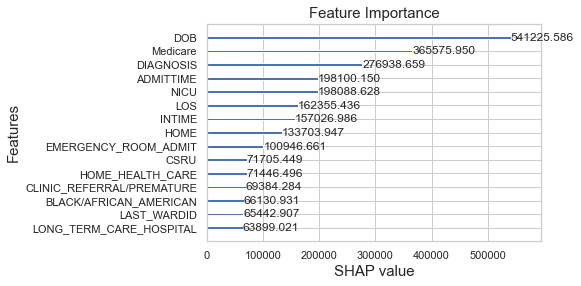

In [30]:
lgb.plot_importance(model2, importance_type="gain", max_num_features=15)
plt.title('Feature Importance',fontsize = 15)
plt.xlabel('SHAP value',fontsize=15)
plt.ylabel('Features',fontsize=15)

In [31]:
y_test_pred = y_pred_test.round(0)
for var in calc_var:
    df = pd.DataFrame(columns=["var_name", "FPR", "FNR"])
    val_list, FPR, FNR = [], [], []
    for col in dummy_dict[var]:
        val_list.append(col)
        FPR_AA, FNR_AA = calc_FPR_FNR(x_test[col].values == 1., y_test_pred, y_test)
        FPR.append(FPR_AA)
        FNR.append(FNR_AA)
        if col == "M":
            val_list.append("F")
            FPR_AA, FNR_AA = calc_FPR_FNR(x_test[col].values == 0., y_test_pred, y_test)
            FPR.append(FPR_AA)
            FNR.append(FNR_AA)
    
    dict_df[var]["FPR_LightGBM"] = FPR
    dict_df[var]["FNR_LightGBM"] = FNR

<ipython-input-18-2296266fd41d>:6: RuntimeWarning: invalid value encountered in long_scalars
  FPR_AA = false_pos_AA / (true_neg_AA + false_pos_AA)
<ipython-input-18-2296266fd41d>:7: RuntimeWarning: invalid value encountered in long_scalars
  FNR_AA = false_neg_AA / (true_pos_AA + false_neg_AA)


In [32]:
for var in calc_var:
    print("=" * 20)
    print("Variable Name: " + var)
    print(dict_df[var])

Variable Name: MARITAL_STATUS
            var_name  FPR_Regression  FNR_Regression  FPR_LightGBM  \
0       LIFE PARTNER        0.142857        0.500000      0.142857   
1            MARRIED        0.310040        0.308432      0.148828   
2          SEPARATED        0.288991        0.321168      0.087156   
3             SINGLE        0.325240        0.327183      0.077908   
4  UNKNOWN (DEFAULT)        0.375000        0.139535      0.200000   
5            WIDOWED        0.542497        0.166761      0.286464   

   FNR_LightGBM  
0      0.500000  
1      0.144202  
2      0.094891  
3      0.107084  
4      0.093023  
5      0.089316  
Variable Name: ETHNICITY
                                             var_name  FPR_Regression  \
0   AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGN...             NaN   
1                                               ASIAN        0.155172   
2                                ASIAN - ASIAN INDIAN        0.263158   
3                                   

Text(0.5, 1.0, 'FPR & FNR Comparison - Marital Status')

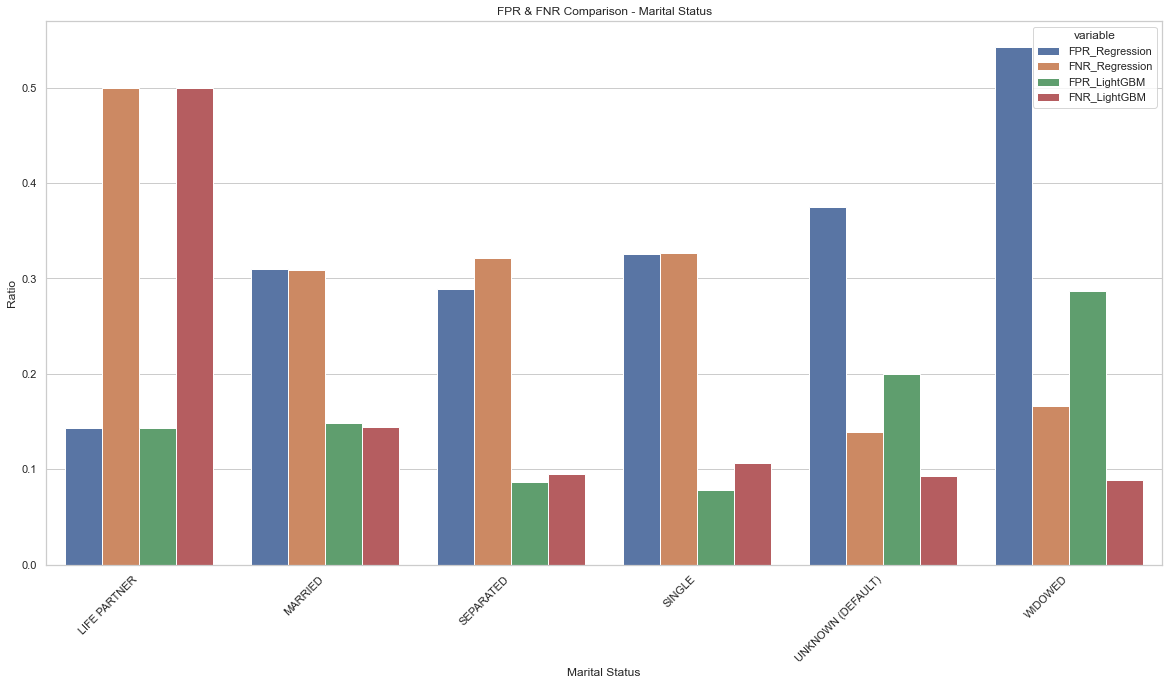

In [33]:
plot_dt = pd.melt(dict_df["MARITAL_STATUS"], id_vars = 'var_name')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='var_name', y='value', hue='variable', data=plot_dt)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.ylabel('Ratio')
plt.xlabel('Marital Status')
plt.title("FPR & FNR Comparison - Marital Status")

Text(0.5, 1.0, 'FPR & FNR Comparison - Gender')

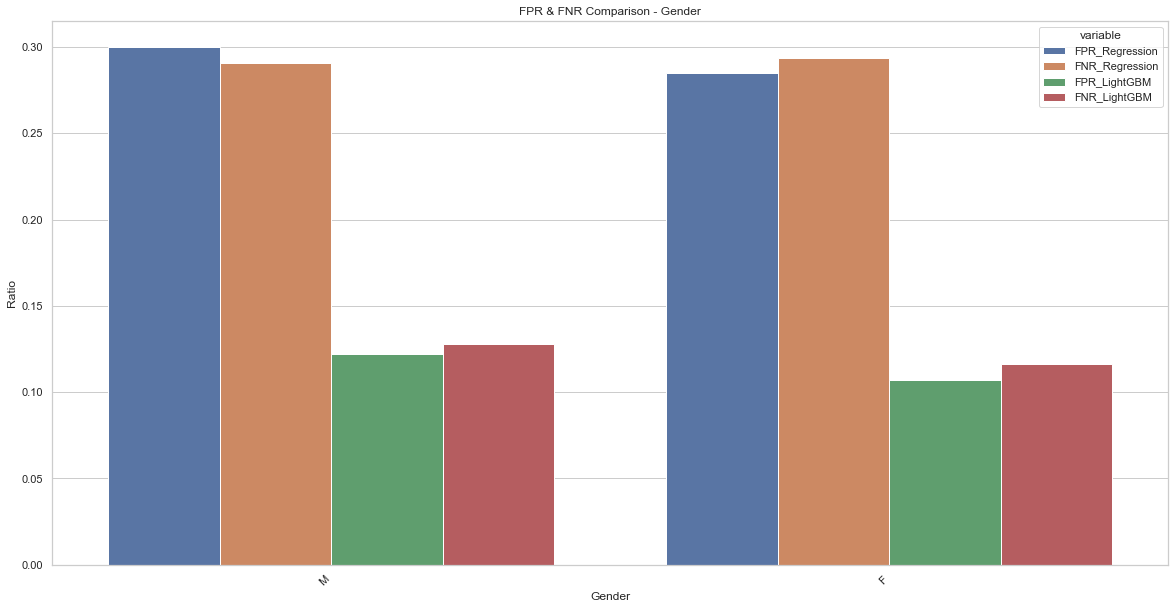

In [34]:
plot_dt = pd.melt(dict_df["GENDER"], id_vars = 'var_name')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='var_name', y='value', hue='variable', data=plot_dt)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.ylabel('Ratio')
plt.xlabel('Gender')
plt.title("FPR & FNR Comparison - Gender")

Text(0.5, 1.0, 'FPR & FNR Comparison - Insurance')

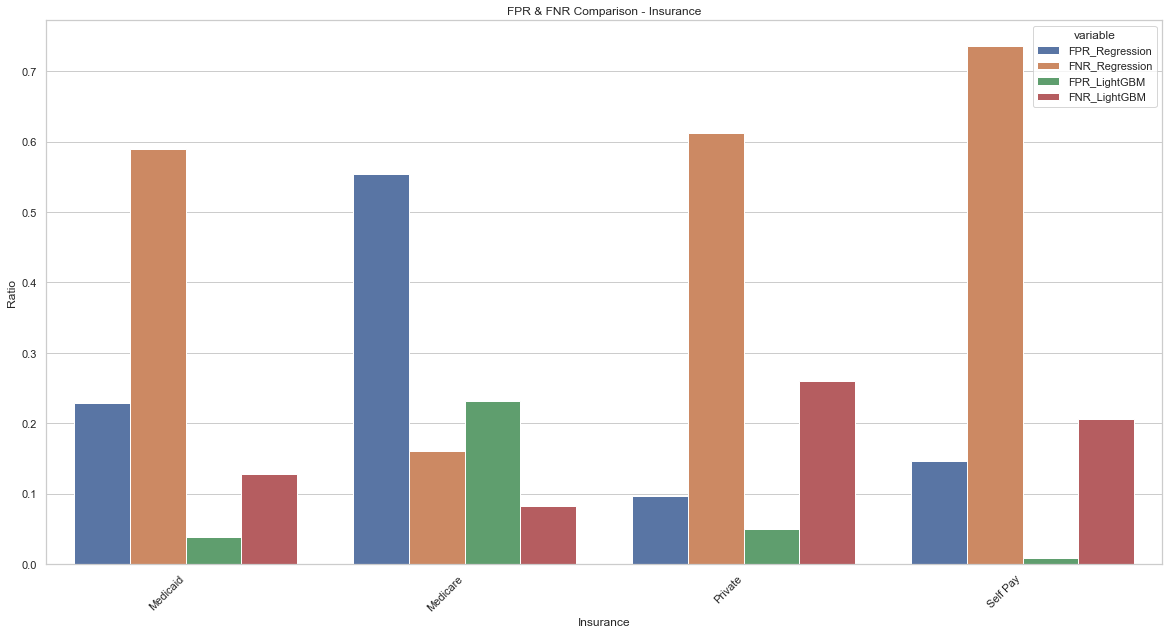

In [35]:
plot_dt = pd.melt(dict_df["INSURANCE"], id_vars = 'var_name')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='var_name', y='value', hue='variable', data=plot_dt)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.ylabel('Ratio')
plt.xlabel('Insurance')
plt.title("FPR & FNR Comparison - Insurance")

Text(0.5, 1.0, 'FPR & FNR Comparison - Ethnicity')

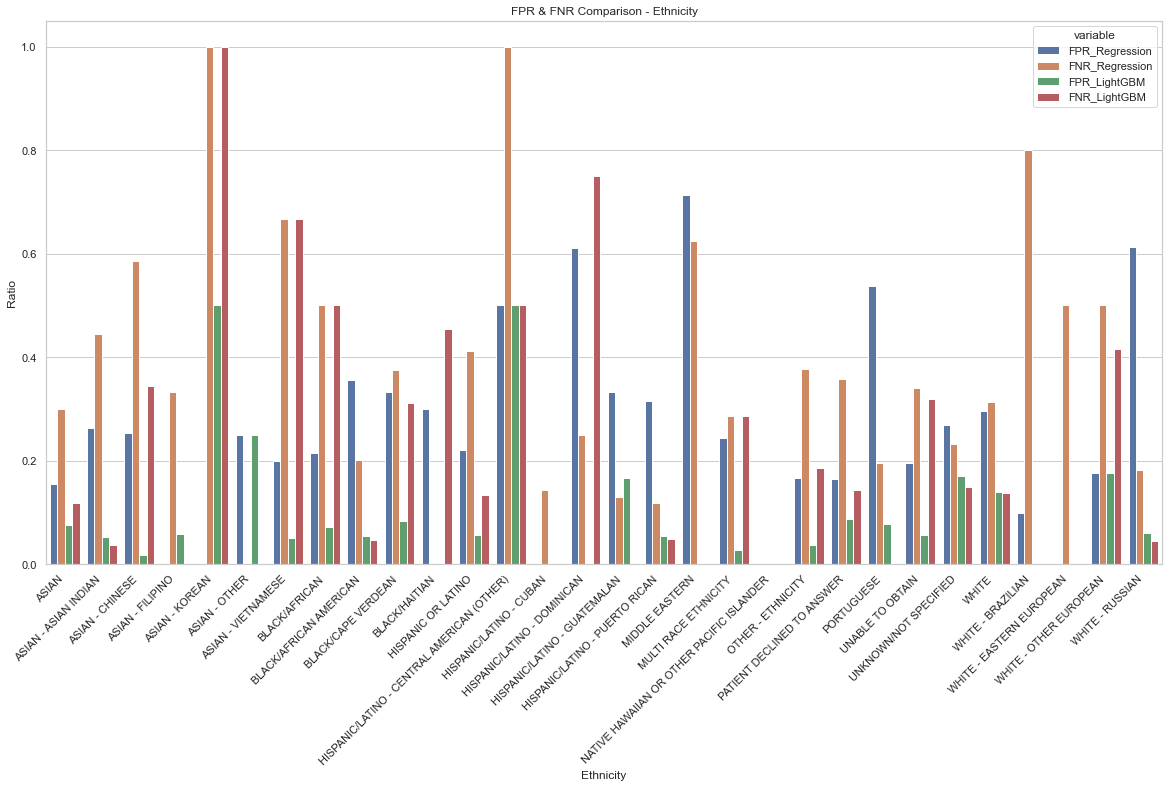

In [36]:
plot_dt = pd.melt(dict_df["ETHNICITY"].dropna(axis=0), id_vars = 'var_name')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='var_name', y='value', hue='variable', data=plot_dt)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.ylabel('Ratio')
plt.xlabel('Ethnicity')
plt.title("FPR & FNR Comparison - Ethnicity")

In [37]:
new_thresholds = np.linspace(0, 1, 100)
ratio_FPR4_list = []
valid_index_FPR4 = []
ratio_FNR4_list = []
valid_index_FNR4 = []
accu = []
for i in range(len(new_thresholds)):
    new_threshold = new_thresholds[i]
    y_test_pred4 = y_pred_test
    y_new_class = np.zeros(y_test_pred4.shape)
    y_new_class[y_test_pred4 >= new_threshold] = 1
    accu.append(accuracy_score(y_test, y_new_class))
    true_pos_AA4 = ((y_new_class == 1) & (x_test["WHITE"].values == 1.) & (y_test == 1)).sum()
    true_neg_AA4 = ((y_new_class == 0) & (y_test == 0) & (x_test["WHITE"].values == 1.)).sum()
    false_pos_AA4 = ((y_new_class == 1) & (y_test == 0) & (x_test["WHITE"].values == 1.)).sum()
    false_neg_AA4 = ((y_new_class == 0) & (y_test == 1) & (x_test["WHITE"].values == 1.)).sum()
    FPR_AA4 = false_pos_AA4 / (true_neg_AA4 + false_pos_AA4)
    FNR_AA4 = false_neg_AA4 / (true_pos_AA4 + false_neg_AA4)
    true_pos_CC4 = ((y_new_class == 1) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.) & (y_test == 1)).sum()
    true_neg_CC4 = ((y_new_class == 0) & (y_test == 0) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.)).sum()
    false_pos_CC4 = ((y_new_class == 1) & (y_test == 0) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.)).sum()
    false_neg_CC4 = ((y_new_class == 0) & (y_test == 1) & (x_test["BLACK/AFRICAN AMERICAN"].values == 1.)).sum()
    FPR_CC4 = false_pos_CC4 / (true_neg_CC4 + false_pos_CC4)
    FNR_CC4 = false_neg_CC4 / (true_pos_CC4 + false_neg_CC4)
    if FPR_CC4 != 0.:
        ratio_FPR4 = FPR_AA4 / FPR_CC4
        ratio_FPR4_list.append(ratio_FPR4)
        valid_index_FPR4.append(i)
    if FNR_CC4 != 0.:
        ratio_FNR4 = FNR_AA4 / FNR_CC4
        ratio_FNR4_list.append(ratio_FNR4)
        valid_index_FNR4.append(i)

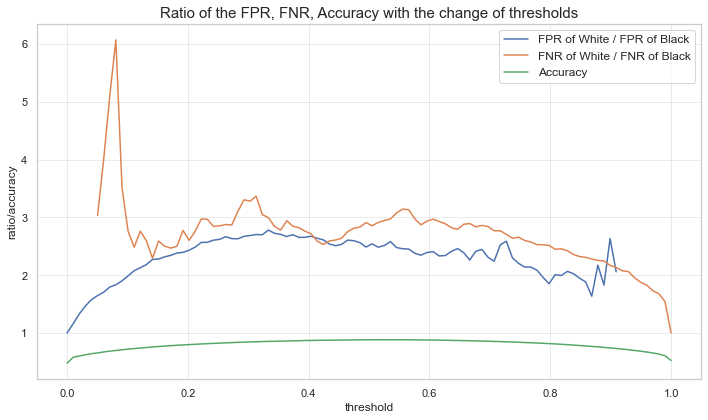

In [38]:
fig = plt.subplots(figsize=(10, 6))
plt.plot(np.array(new_thresholds)[valid_index_FPR4], np.array(ratio_FPR4_list), label="FPR of White / FPR of Black")
plt.plot(np.array(new_thresholds)[valid_index_FNR4], np.array(ratio_FNR4_list), label="FNR of White / FNR of Black")
plt.plot(new_thresholds, accu, label="Accuracy")
plt.xlabel("threshold")
plt.ylabel("ratio/accuracy")
plt.title(
    "Ratio of the FPR, FNR, Accuracy with the change of thresholds",
    fontsize=15)
plt.legend(fontsize=12)
plt.grid(':', alpha=0.4)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression
lr_l2 = LogisticRegression(penalty = 'l2', max_iter=10000).fit(x_train, y_train)

lr_l2_train_acc = accuracy_score(y_train, lr_l2.predict(x_train))
lr_l2_test_acc = accuracy_score(y_test, lr_l2.predict(x_test))

lr_l2_test_auc = roc_auc_score(y_test,lr_l2.predict(x_test))
lr_l2_train_auc = roc_auc_score(y_train,lr_l2.predict(x_train))
lr_l2_fpr, lr_l2_tpr,_=roc_curve(y_test,lr_l2.predict_proba(x_test)[:,1])

result_df = result_df.append(pd.DataFrame({'model':['logistic l2'],'test_accuracy':[lr_l2_test_auc],
                                           'train_accuracy':[lr_l2_train_auc]}),ignore_index=True)

In [41]:
np.random.seed(109)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(x_train, y_train);
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)
acc_rf_test = accuracy_score(y_test, rf_pred_test)
acc_rf_train = accuracy_score(y_train,rf_pred_train)

rf_test_auc = roc_auc_score(y_test,rf_pred_test)
rf_train_auc = roc_auc_score(y_train,rf_pred_train)
rf_fpr, rf_tpr,_=roc_curve(y_test,rf.predict_proba(x_test)[:,1])

result_df = result_df.append(pd.DataFrame({'model':['random forest'],'train_accuracy':[acc_rf_train],
                                           'test_accuracy':[acc_rf_test]}),ignore_index=True)




print('Random Forest model: Accuracy on train set is ', str(round(acc_rf_train,4)))
print('Random Forest model: Accuracy on test set is ', str(round(acc_rf_test,4)))

Random Forest model: Accuracy on train set is  0.7773
Random Forest model: Accuracy on test set is  0.7653


In [42]:
result_df

,model,test_accuracy,train_accuracy
0,logistic,0.707495,0.711198
1,lightgbm,0.881087,0.935033
2,logistic l2,0.735151,0.733014
3,random forest,0.765310,0.777271
